# <font color=green>deepBreaks Applications</font>
## Modeling spectral tuning sites of opsin proteins based on amino-acid sequence...  

# <font color=red>Step 0: mySQL DB Setup -</font> Script 0
## *The following script sets up the schema for our vizphiz database.*
```

In [ ]:
#All neccessary packages to import for data process steps.
#import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 
import csv

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password= "Geass5566!!" #change to your password
  )

mycursor = mydb.cursor()

try:
  mycursor.execute("""
  DROP DATABASE vizphiz_db;
  """)
  mydb.commit() 
except:
  "vizphiz_db does not yet exist!"
  pass

mycursor.execute("""
CREATE DATABASE vizphiz_db;
""")
mydb.commit() 

mycursor.execute("""
USE vizphiz_db;
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE scp
(
id int unsigned not null primary key,
genus varchar(50),
species varchar(50),
celltype varchar(50),
cellsubtype varchar(50),
lamdamax decimal(9,5),
error decimal(9,5),
chromophore varchar(50),
method varchar(50),
stage varchar(50),
refid int,
notes varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE heterologous
(
hetid int unsigned not null primary key,
genus varchar(50),
species varchar(50),
accession varchar(500),
mutations varchar(500),
lamdamax decimal(9,5),
error decimal(9,5),
cellculture varchar(50),
purification varchar(50),
spectrum varchar(50),
sourcetype varchar(50),
refid int,
notes varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE links
(
linkid int unsigned not null primary key,
accession varchar(500),
maxid int,
refid int,
evidence varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE litsearch
(
searchid int,
researcher varchar(50),
month int,
year int,
engine varchar(500),
keywords varchar(500)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE opsins
(
opsinid int unsigned not null primary key,
genefamily varchar(50),
genenames varchar(50),
genus varchar(50),
phylum varchar(25),
class varchar(25),
species varchar(50),
db varchar(50),
accession varchar(500),
dna varchar(10000),
aa varchar(3333),
refid int
);
""")

mydb.commit()

mycursor.execute("""
CREATE TABLE refs
(
refid int,
doi varchar(1000),
searchid int
);
""")
mydb.commit()

mydb.close()

In [ ]:
#All neccessary packages to import for data process steps.
import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 

# <font color=red>STEP 0: Data Base Setup -</font> Script 1 - Import Literature-Search data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.1/raw_database_files'
file1 = open(f'{path}/litsearch.csv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.litsearch (searchid, researcher, month, year, engine, keywords) VALUES (%s, %s, %s,%s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[4], columns[5])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 0: Data Base Setup -</font> Script 2 - Import References into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.1/raw_database_files'
file1 = open(f'{path}/references.csv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.refs (refid, doi, searchid) VALUES (%s, %s, %s)"
      val = (columns[0], columns[1], columns[2])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")
    

# <font color=red>STEP 0: Data Base Setup -</font> Script 3 - Import Heterolgous Data into mySQL


In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.1/raw_database_files'
file1 = open(f'{path}/heterologous.csv', 'r', encoding="utf8")
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")
      print(columns)
      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.heterologous (hetid, genus, species, accession, mutations, lamdamax, error, cellculture, purification, spectrum, sourcetype, refid) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[4], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 0: Data Base Setup -</font> Script 4 - Import Seqience Data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!"
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.1/raw_database_files'
file1 = open(f'{path}/opsins.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.opsins (opsinid, genefamily, genenames, phylum, class, genus, species, db, accession, dna, aa, refid) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11], columns [12])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")



# <font color=red>STEP 1: Extract Data Subsets From Vizphiz</font>
### Output = 8 Different Data Subsets 

In [3]:
#All neccessary packages to import for data process steps.
import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 
import csv

In [23]:
#directory preperation
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seq_report_dir = str(f'vpod_1.1_data_splits_{dt_label}')
os.makedirs(seq_report_dir)

#declaring all variables for different sequence data subsets and their metadata
wd_output = f'{seq_report_dir}/wds.txt'
sws_output = f'{seq_report_dir}/uss.txt'
mws_output = f'{seq_report_dir}/mls.txt'
rod_output = f'{seq_report_dir}/rod.txt'
wd_ni_output = f'{seq_report_dir}/vert.txt'
wt_vert_output = f'{seq_report_dir}/wt_vert.txt'
inv_output = f'{seq_report_dir}/inv_only.txt'
wt_inv_output = f'{seq_report_dir}/wt_inv_only.txt'
nmoc_output = f'{seq_report_dir}/wt.txt'
mut_output = f'{seq_report_dir}/mut_only.txt'
wh_metadata = f'{seq_report_dir}/wds_meta.tsv'
sw_metadata = f'{seq_report_dir}/uss_meta.tsv'
mw_metadata = f'{seq_report_dir}/mls_meta.tsv'
rh_metadata = f'{seq_report_dir}/rod_meta.tsv'
wd_ni_metadata = f'{seq_report_dir}/vert_meta.tsv'
inv_metadata = f'{seq_report_dir}/inv_meta.tsv'
nmoc_metadata = f'{seq_report_dir}/wt_meta.tsv'
mut_metadata = f'{seq_report_dir}/mut_meta.tsv'
wt_vert_metadata = f'{seq_report_dir}/wt_vert_meta.tsv'
redundant_datapoints = f'{seq_report_dir}/redundant_datapoints_log.tsv'


#Setting the names for the headers at the top of each metadata file
meta_data_list = [wh_metadata,sw_metadata,mw_metadata,rh_metadata,wd_ni_metadata,inv_metadata,nmoc_metadata,mut_metadata]
meta_first_line = "\tLambda_Max\tSpecies\tOpsin_Family\tPhylum\tClass\tAccession\tMutations\tRefId\nBovine\t500.0000\tBos_tarus\tRh1\tChordata\tMammalia\tNM_001014890\n"
invert_first_line = "\tLambda_Max\tSpecies\tOpsin_Family\tPhylum\tClass\tAccession\tMutations\tRefId\nSquid\t473.0000\tTodarodes_pacificus\tRh1\tMollusca\tCephalopoda\tX70498\n"
bovine_seq = ">Bovine\nMNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFLLIMLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLVGWSRYIPEGMQCSCGIDYYTPHEETNNESFVIYMFVVHFIIPLIVIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWLPYAGVAFYIFTHQGSDFGPIFMTIPAFFAKTSAVYNPVIYIMMNKQFRNCMVTTLCCGKNPLGDDEASTTVSKTETSQVAPA\n"

#misc int variales for the counting loops
m = 0
s = 0
l = 0
r = 0
c = 0
z = 0
q = 0
wt_vert = 0
mut = 0

#regular expressions for filtering different opsin family types 
rod = re.compile('Rh[0-2]|exoRh')
d = re.compile("^NM_001014890.2$|^NM_001014890$|^P02699.1$")
sws_reg = re.compile('^SWS')
uvs_reg = re.compile('^UVS')
mws_reg = re.compile('^MWS')
lws_reg = re.compile('^LWS')
rh1_reg = re.compile('^Rh[0-1]|exoRh')
rh2_reg = re.compile('^Rh2')

In [24]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database="vizphiz",
  password="Geass5566!!"
) 
mycursor = mydb.cursor()

sql = "select DISTINCT o.genus,o.species,o.genefamily,o.accession,h.lamdamax,o.aa,o.phylum,o.class,h.mutations,o.refid from vizphiz_db.opsins o, vizphiz_db.heterologous h WHERE (o.accession = h.accession AND o.refid = h.refid); "
mycursor.execute(sql)
myresult = mycursor.fetchall()
seq_list = []
lmax_list = []
species_list = []
acc_list = []
gene_family_list = []
ignore_filter = False

for x in myresult:
  skip = False
  lmax = x[4]  
  try:
    index = seq_list.index(x[5].strip().replace(' ',''))
    lmax_of_index = lmax_list[index]
    species_of_index = species_list[index]
    acc_of_index = acc_list[index]
    gene_family_of_index = gene_family_list[index]
  except:
    lmax_of_index = None
    
  if (x[5].strip() in seq_list) and (x[4] != lmax_of_index) and (lmax_of_index != None):
    skip = True
    species_check = str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')
    if species_of_index != species_check:
      with open(redundant_datapoints, 'a+') as f:
        f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence but have conflicting lmax values ({lmax_of_index} and {lmax} respectively).\nDespite that the two sequences are from different species ({species_of_index} and {species_check}) we will skip this entry but take the value from the first entry.\nNote - the gene families of the two sequences are {gene_family_of_index} and {x[2]} - if this raises concern, please double check the entries to resolve this issue.\n\n''')
      lmax = lmax_of_index
    else:
      with open(redundant_datapoints, 'a+') as f:
        f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence but have conflicting lmax values ({lmax_of_index} and {lmax} respectively).\nBecause the two sequences are from the same species ({species_of_index}) we will skip this entry and only keep the value from the first entry.\n\n''')
  elif (x[5].strip().replace(' ','') in seq_list) and (x[4] == lmax_of_index):
    skip = True
    species_check = str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')
    if species_of_index != species_check:
      with open(redundant_datapoints, 'a+') as f:
          f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence and have the same lmax values ({lmax_of_index}).\nDespite that the two sequences are from different species ({species_of_index} and {species_check}) we will skip this entry but take the value from the first entry.\nNote - the gene families of the two sequences are {gene_family_of_index} and {x[2]} -  if this raises concern, please double check the entries to resolve this issue.\n\n''')
    
    else:
      with open(redundant_datapoints, 'a+') as f:
        f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence and have the same lmax values ({lmax_of_index}).\nBecause the two sequences are from the same species ({species_of_index}) we will skip this entry and only keep the value from the first entry.\n\n''')
  else:
    species_list.append(str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ',''))
    gene_family_list.append(x[2])
    acc_list.append(x[3])
    lmax_list.append(lmax)
    seq_list.append(x[5].strip().replace(' ',''))
  
  if ignore_filter == True:
    skip = False
    
  if (lmax == 0) or (skip == True):
    pass   
  else:    
  #SEQUENCE-DATA SECTION
    #whole-dataset    
    with open(wd_output, 'a') as f:
      if m == 0:
          f.write(bovine_seq)
      if (d.match(x[3])):
        pass
      else:
        m += 1 
        #This makes the fasta format file
        seq = ">S" + str(m)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #vertebrate dataset
    with open(wd_ni_output, 'a') as f:
      if x[6] != "Chordata" or d.match(x[3]):
        pass
      else:
        if c == 0:
          f.write(bovine_seq)
        c += 1 
        #This makes the fasta format file
        seq = ">S" + str(c)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #invertebrate dataset
    with open(inv_output, 'a') as f:
      if (x[6] != "Chordata"):
        if q == 0:
          f.write(">Squid\nMGRDLRDNETWWYNPSIVVHPHWREFDQVPDAVYYSLGIFIGICGIIGCGGNGIVIYLFTKTKSLQTPANMFIINLAFSDFTFSLVNGFPLMTISCFLKKWIFGFAACKVYGFIGGIFGFMSIMTMAMISIDRYNVIGRPMAASKKMSHRRAFIMIIFVWLWSVLWAIGPIFGWGAYTLEGVLCNCSFDYISRDSTTRSNILCMFILGFFGPILIIFFCYFNIVMSVSNHEKEMAAMAKRLNAKELRKAQAGANAEMRLAKISIVIVSQFLLSWSPYAVVALLAQFGPLEWVTPYAAQLPVMFAKASAIHNPMIYSVSHPKFREAISQTFPWVLTCCQFDDKETEDDKDAETEIPAGESSDAAPSADAAQMKEMMAMMQKMQQQQAAYPPQGYAPPPQGYPPQGYPPQGYPPQGYPPQGYPPPPQGAPPQGAPPAAPPQGVDNQAYQA\n")
        q += 1 
        #This makes the fasta format file
        seq = ">S" + str(q)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)
      else:
        pass
    
    #wild-type dataset
    with open(nmoc_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if z == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          z += 1 
          #This makes the fasta format file
          seq = ">S" + str(z)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

    #wild-type vertebrates dataset
    with open(wt_vert_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if (x[6] != "Chordata") or d.match(x[3]) or ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if wt_vert == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          wt_vert += 1 
          #This makes the fasta format file
          seq = ">S" + str(wt_vert)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

    #just mutants dataset
    with open(mut_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        if mut == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          mut += 1 
          #This makes the fasta format file
          seq = ">M" + str(mut)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)
      else:
        pass
    
    #UVS and SWS dataset
    with open(sws_output, 'a') as f:
      p = re.compile('^SWS|^UVS')
      if p.match(x[2]) and x[6] == "Chordata":
        s+=1
        if s == 1:
          f.write(bovine_seq)
        #This makes the fasta format file
        seq = ">S" + str(s)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #MWS and LWS dataset
    with open(mws_output, 'a') as f:
      p = re.compile('^MWS|^LWS')
      if p.match(x[2]) and x[6] == "Chordata":
        l+=1
        if l == 1:
          f.write(bovine_seq)
        #This makes the fasta format file
        seq = ">S" + str(l)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #rods dataset
    with open(rod_output, 'a') as f:
      p = re.compile('Rh[0-2]|exoRh')
      if p.match(x[2]):
        if r == 0:
          f.write(bovine_seq)
        if (x[6] != "Chordata") or d.match(x[3]):
          pass
        else:
          r+=1
          #This makes the fasta format file
          seq = ">S" + str(r)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

  #METADATA SECTION - same idea and naming convention for the files as above. 
    with open(wh_metadata, 'a') as g:
      if m == 1:
          g.write(meta_first_line)      
      if (d.match(x[3])):
        pass
      else:        
        md =  str("S" + str(m) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" +str(x[9]).strip() + "\n"
        g.write(md)

    with open(wd_ni_metadata, 'a') as g:
      if x[6] != "Chordata" or d.match(x[3]):
        pass
      else:
        if c == 1:
          g.write(meta_first_line)      

        md =  str("S" + str(c) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(inv_metadata, 'a') as g:
      if (x[6] != "Chordata"):
        if q == 1:
          g.write(invert_first_line)
        md =  str("S" + str(q) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)
      else:
        pass
          
    with open(sw_metadata, 'a') as g:
      p = re.compile('^SWS|^UVS')
      if p.match(x[2]) and x[6] == "Chordata":
        if s == 1:
          g.write(meta_first_line)
        md =  str("S" + str(s) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(mw_metadata, 'a') as g:
      p = re.compile('^MWS|^LWS')
      if p.match(x[2]) and x[6] == "Chordata":
        if l == 1:
          g.write(meta_first_line)        
        md =  str("S" + str(l) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(rh_metadata, 'a') as g:
      p = re.compile('Rh[0-3]|exoRh')

      if p.match(x[2]):
        if r == 1:
          g.write(meta_first_line)      
        if (x[6] != "Chordata") or d.match(x[3]):
          pass
        else:  
          md =  str("S" + str(r) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
          g.write(md)

    with open(nmoc_metadata, 'a') as g:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if z == 1:
          g.write(meta_first_line)      
        if(d.match(x[3])):
          pass
        else:        
          md =  str("S" + str(z) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
          g.write(md)
          
    with open(wt_vert_metadata, 'a') as g:
      if (x[6] != "Chordata") or d.match(x[3]) or ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if wt_vert == 1:
          g.write(meta_first_line)      

        md =  str("S" + str(wt_vert) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(mut_metadata, 'a') as g:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        if mut == 1:
          g.write(meta_first_line)      
        if(d.match(x[3])):
          pass
        else:        
          md =  str("M" + str(mut) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
          g.write(md)
      else:
        pass
    

In [25]:
#Creates an additional sequence file where all the mutants are 
#added to the bottom of the wild-type sequences so they can be aligned for WT model test.
mut_only = open(mut_output).readlines()
mut_nmoc = f'{seq_report_dir}/wt_mut_added.txt'
shutil.copy(nmoc_output , mut_nmoc)
x = 0
for lines in mut_only:
  if x <= 1:
    if x == 0:
      with open(mut_nmoc, 'a') as m:
        m.write('\n')
    else:
      pass
    x+=1
  else:
    with open(mut_nmoc, 'a') as m:
      m.write(lines)

# <font color=red>STEP 2: Align Raw Data w/MAFFT and Format for 'deepBreaks'</font>
## REMINDER - You will need to change the directory for the 'mafft_exe' variable to the one of your own operating system!


In [26]:
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO

data_split_list = [wd_output,sws_output,mws_output,rod_output,wd_ni_output,inv_output,nmoc_output,wt_vert_output,mut_nmoc,mut_output]
output_list = []
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat' 

for data in data_split_list:
    output = f'{data.split(".")[0]}.{data.split(".")[1]}_aligned.txt'
    mafft_cline = MafftCommandline(mafft_exe, input=f'./{data}')
    #print(mafft_cline)
    stdout, stderr = mafft_cline()

    with open(output, "w") as handle:
        handle.write(stdout)
        #print(handle)
    align = AlignIO.read(output, "fasta")
    output_list.append(f'{output}')


In [27]:
print(output_list)

['vpod_1.1_data_splits_2024-07-25_15-44-04/wds_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/uss_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/mls_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/rod_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/vert_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/inv_only_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/wt_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/wt_vert_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/wt_mut_added_aligned.txt', 'vpod_1.1_data_splits_2024-07-25_15-44-04/mut_only_aligned.txt']


In [28]:
for item in output_list:
    output = item.split('.')[0] + '.' + item.split('.')[1]
    print(output)

vpod_1.1_data_splits_2024-07-25_15-44-04/wds_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/uss_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/mls_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/rod_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/vert_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/inv_only_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/wt_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/wt_vert_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/wt_mut_added_aligned
vpod_1.1_data_splits_2024-07-25_15-44-04/mut_only_aligned


In [29]:
#enters list of aligned text files here.
inputs = output_list
deep_breaks_input_data = []

i=0
k = 0
for item in inputs:
    print(item)
    lines = open(inputs[i]).readlines()
    output = f'./{inputs[i].split(".")[0]}.{inputs[i].split(".")[1]}_VPOD_1.1_het.fasta'
    deep_breaks_input_data.append(output)
    print(output)
    file = open(output, 'w')
    m=0
    for line in lines:
        snip = str(lines[k])
        if '>' in snip:
            if m == 0:
                m+=1
            else:
                file.write("\n")
            file.write(snip)
        else:
            entry = ""
            entry = str(snip.replace("\n",""))
            file.write(entry)
        k+=1
    k = 0
    i+=1
    file.close()

vpod_1.1_data_splits_2024-07-25_15-44-04/wds_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/wds_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/uss_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/uss_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/mls_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/mls_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/rod_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/rod_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/vert_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/vert_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/inv_only_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/inv_only_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/wt_aligned.txt
./vpod_1.1_data_splits_2024-07-25_15-44-04/wt_aligned_VPOD_1.1_het.fasta
vpod_1.1_data_splits_2024-07-25_15-44-04/wt_vert_aligned.txt
./vpod_1.1_d

In [30]:
print(deep_breaks_input_data)

['./vpod_1.1_data_splits_2024-07-25_15-44-04/wds_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/uss_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/mls_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/rod_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/vert_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/inv_only_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/wt_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/wt_vert_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/wt_mut_added_aligned_VPOD_1.1_het.fasta', './vpod_1.1_data_splits_2024-07-25_15-44-04/mut_only_aligned_VPOD_1.1_het.fasta']


# <font color=red>STEP 3: deepBreaks</font>
## THIS IS A LONG SECTION! 
### **Output** = folder containing all results from model training, including comparison of model performances, an amino-acid site importance report + figures, and the top 5 trained models in a .pkl file format.

In [126]:
# importing deepBreaks libraries 
from deepBreaks.utils import get_models, get_scores, get_params, get_simp_params, make_pipeline
from deepBreaks.preprocessing import MisCare, ConstantCare, URareCare, CustomOneHotEncoder
from deepBreaks.preprocessing import FeatureSelection, CollinearCare
from deepBreaks.preprocessing import read_data
from deepBreaks.models import model_compare_cv, finalize_top, importance_from_pipe, mean_importance, summarize_results
from deepBreaks.visualization import plot_scatter, dp_plot, plot_imp_model, plot_imp_all
from deepBreaks.preprocessing import write_fasta
import warnings
import datetime
import os
import shutil 

In [62]:
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [63]:
# defining user params, file pathes, analysis type

#assign your path to folder containing all the datasplits
path = './vpod_1.1_data_splits_2024-07-25_15-44-04'
# path to sequences of interest
seqFileName = f'{path}/wt_aligned_VPOD_1.1_het.fasta' 
# path to corresponding metadata of interest
metaDataFileName = f'{path}/wt_meta.tsv' 

# name of the phenotype
mt = 'Lambda_Max'

# type of the sequences
seq_type = 'aa'

# type of the analysis if it is a classification model, then we put cl instead of reg
ana_type = 'reg' 

gap_threshold = 0.50

#Whether or not you want to drop the reference sequence from the training data- Usually 'Bovine' or 'Squid'
drop_ref = False


In [64]:
# making a unique directory for saving the reports of the analysis
print('direcory preparation')
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seqFile = seqFileName.split('/')[2]
#print(seqFile)
seqFile = seqFile.split('.')[0]
#print(seqFile)
report_dir = str(seqFile +'_' + mt + '_' + dt_label)
os.makedirs(report_dir)

direcory preparation


In [65]:
%%time
print('reading meta-data')
# importing metadata
meta_data = read_data(metaDataFileName, seq_type = None, is_main=False)
# importing sequences data
print('reading fasta file')

tr = read_data(seqFileName, seq_type = seq_type, is_main=True, gap_threshold=gap_threshold)

shutil.copy2(f'{seqFileName}',report_dir)
write_fasta(dat = tr, fasta_file = f'{seqFile}_gap_dropped.fasta' , report_dir = report_dir)

reading meta-data
reading fasta file
wt_aligned_VPOD_1_gap_dropped.fasta was saved successfully
CPU times: total: 312 ms
Wall time: 317 ms


In [66]:
try:
    reference_seq = tr.loc['Bovine'].copy()
    ref_seq_name = 'bovine'
    if drop_ref == True:
        meta_data = meta_data.drop('Bovine')
    #print(bovine)
except:
    reference_seq = tr.loc['Squid'].copy()
    ref_seq_name = 'squid'
    #print(squid)
reference_seq.to_csv(path_or_buf= f'{report_dir}/ref_sequence.csv',index = True,mode="w")

In [67]:
tr = tr.merge(meta_data.loc[:, mt],  left_index=True, right_index=True)
tr.shape

(334, 355)

In [68]:
tr.head()

p1   p2   p3 p4 p5 p6 p7 p8 p9 p10  ... p346 p347 p348 p349 p350  \
Bovine    M    N    G  T  E  G  P  N  F   Y  ...  NaN  NaN  NaN    S    Q   
S1        M    N    G  T  E  G  P  Y  F   Y  ...    S    A  NaN    S    S   
S2      NaN  NaN  NaN  T  E  G  P  Y  F   Y  ...    S    A  NaN    S    S   
S3      NaN  NaN  NaN  T  E  G  P  D  F   Y  ...    S    A  NaN    S    S   
S4      NaN  NaN  NaN  T  E  G  P  F  F   Y  ...    S    A  NaN    S    S   

       p351 p352 p353 p354 Lambda_Max  
Bovine    V    A    P    A      500.0  
S1        V    S    P    A      502.0  
S2        V    S    P    A      502.0  
S3        V    S    P    A      481.0  
S4        V    S    P    A      494.0  

[5 rows x 355 columns]

In [105]:
# Get Unique Phyla
unique_phyla = meta_data['Phylum'].unique()
unique_class = meta_data['Class'].unique()

In [104]:
unique_class

array(['Mammalia', 'Actinopteri', 'Ancestor', 'Sarcopterygii',
       'Lepidosauria', 'Hyperoartia', 'Amphibia', 'Aves', 'Insecta',
       'Polychaeta', 'Magnoliopsida', 'Bivalvia', 'Malacostraca',
       'Merostomata', 'Oryzias', 'Arachnida', 'Chondrichthyes',
       'Leptocardii'], dtype=object)

In [70]:
unique_phyla

array(['Chordata', 'Arthropoda', 'Annelida', 'Streptophyta', 'Mollusca'],
      dtype=object)

In [71]:
import string
# Generate Letter Assignments (Automatically)
letters = string.ascii_uppercase[:len(unique_phyla)]
letters

'ABCDE'

In [95]:
letters_class = string.ascii_uppercase[:len(unique_class)]
letters_class

'ABCDEFGHIJKLMNOPQR'

In [72]:
# Create Mapping Dictionary
phylum_to_letter = dict(zip(unique_phyla, letters))
phylum_to_letter

{'Chordata': 'A',
 'Arthropoda': 'B',
 'Annelida': 'C',
 'Streptophyta': 'D',
 'Mollusca': 'E'}

In [96]:
# Create Mapping Dictionary
class_to_letter = dict(zip(unique_class, letters_class))
class_to_letter

{'Mammalia': 'A',
 'Actinopteri': 'B',
 'Ancestor': 'C',
 'Sarcopterygii': 'D',
 'Lepidosauria': 'E',
 'Hyperoartia': 'F',
 'Amphibia': 'G',
 'Aves': 'H',
 'Insecta': 'I',
 'Polychaeta': 'J',
 'Magnoliopsida': 'K',
 'Bivalvia': 'L',
 'Malacostraca': 'M',
 'Merostomata': 'N',
 'Oryzias': 'O',
 'Arachnida': 'P',
 'Chondrichthyes': 'Q',
 'Leptocardii': 'R'}

In [73]:
import numpy as np
import csv
import pandas as pd

In [74]:
y = tr.loc[:, mt].values
tr.drop(mt, axis=1, inplace=True)
print('Shape of data is: ', tr.shape)

Shape of data is:  (334, 354)


In [75]:
# Apply Mapping to New Column
tr[f'p_{tr.shape[1] + 1}'] = meta_data['Phylum'].map(phylum_to_letter)

In [97]:
tr[f'p_{tr.shape[1] + 1}'] = meta_data['Class'].map(class_to_letter)

**Attention**: metadata and sequences data should have the names as their row names and for each sequence their must be a value in the meta data file.

In [98]:
print('metadata looks like this:')
meta_data.head()

metadata looks like this:


Lambda_Max                      Species Opsin_Family    Phylum  \
Bovine       500.0                    Bos_tarus          Rh1  Chordata   
S1           502.0            Neoniphon_sammara          Rh1  Chordata   
S2           502.0          Neoniphon_argenteus          Rh1  Chordata   
S3           481.0       Neoniphon_aurolineatus          Rh1  Chordata   
S4           494.0  Sargocentron_punctatissimum          Rh1  Chordata   

              Class     Accession  Mutations  RefId  
Bovine     Mammalia  NM_001014890        NaN    NaN  
S1      Actinopteri      U57536.1      160.0    NaN  
S2      Actinopteri      U57540.1      160.0    NaN  
S3      Actinopteri      U57541.1      160.0    NaN  
S4      Actinopteri      U57543.1      160.0    NaN

In [99]:
print('sequence data looks like this:')
tr.head()

sequence data looks like this:


p1   p2   p3 p4 p5 p6 p7 p8 p9 p10  ... p347 p348 p349 p350 p351  \
Bovine    M    N    G  T  E  G  P  N  F   Y  ...  NaN  NaN    S    Q    V   
S1        M    N    G  T  E  G  P  Y  F   Y  ...    A  NaN    S    S    V   
S2      NaN  NaN  NaN  T  E  G  P  Y  F   Y  ...    A  NaN    S    S    V   
S3      NaN  NaN  NaN  T  E  G  P  D  F   Y  ...    A  NaN    S    S    V   
S4      NaN  NaN  NaN  T  E  G  P  F  F   Y  ...    A  NaN    S    S    V   

       p352 p353 p354 p_355 p_356  
Bovine    A    P    A     A     A  
S1        S    P    A     A     B  
S2        S    P    A     A     B  
S3        S    P    A     A     B  
S4        S    P    A     A     B  

[5 rows x 356 columns]

In [78]:
y_ev = 1239.8 / np.array(y)

### Preprocessing
In this step, we do all these steps:
1. dropping columns with a number of missing values above a certain threshold  
2. dropping zero entropy columns  
3. imputing missing values with the mode of that column  
4. replacing cases with a frequency below a threshold (default 1.5%) with the mode of that column
5. dropping zero entropy columns
6. use statistical tests (each position against the phenotype) and drop columns with p-values below a threshold (default 0.25)
7. one-hot encode the remaining columns
8. calculate the pair-wise distance matrix for all of the columns
9. use the distance matrix for DBSCAN and cluster the correlated positions together
10. keep only one column (closes to center of each cluster) for each group and drop the rest from the training data set

In [113]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.25, keep=False)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.1, keep=False))
    ])

In [128]:
%%time
report, top = model_compare_cv(X=tr, y=y_ev, preprocess_pipe=prep_pipeline,
                               models_dict=get_models(ana_type=ana_type),
                               scoring=get_scores(ana_type=ana_type),
                               report_dir=report_dir,
                               cv=10, ana_type=ana_type, cache_dir=report_dir)

Fitting rf...
Fitting Adaboost...
Fitting et...
Fitting gbr...
Fitting dt...
Fitting lr...
Fitting Lasso...
Fitting LassoLars...
Fitting BayesianRidge...
Fitting HubR...
Fitting lgbm...
Fitting xgb...
CPU times: total: 9.33 s
Wall time: 53.2 s


MAE = Mean Absolute Error

MSE = Mean Squared Error

RMSE = Rooted Mean Square Error

MAPE = Mean Absolute % Error - the average magnitude of error produced by a model, or how far off predictions are on average. A MAPE value of 20% means that the average absolute percentage difference between the predictions and the actuals is 20%

In [129]:
report

R2           MAE           MSE          RMSE  \
xgb            9.224521e-01  5.705466e-02  8.786243e-03  8.904273e-02   
gbr            9.189638e-01  5.662092e-02  8.552683e-03  8.573635e-02   
BayesianRidge  8.894320e-01  6.763966e-02  1.145956e-02  1.032457e-01   
rf             8.838926e-01  6.439523e-02  1.261009e-02  1.058031e-01   
lgbm           8.791862e-01  6.337997e-02  1.338683e-02  1.074027e-01   
Adaboost       8.655679e-01  8.083279e-02  1.471820e-02  1.147506e-01   
et             8.473065e-01  6.785599e-02  1.677483e-02  1.200146e-01   
HubR           8.155843e-01  8.435816e-02  1.982871e-02  1.320099e-01   
dt             7.630785e-01  7.685891e-02  2.494979e-02  1.455983e-01   
Lasso         -6.523412e-02  2.689563e-01  1.272560e-01  3.505237e-01   
LassoLars     -6.523412e-02  2.689563e-01  1.272560e-01  3.505237e-01   
lr            -1.281027e+18  1.620226e+08  1.491482e+17  2.500340e+08   

                       MAPE  
xgb            2.138603e-02  
gbr            2.112875e-02  
BayesianRidge  2.526565e-02  
rf             2.340303e-02  
lgbm           2.311315e-02  
Adaboost       3.003967e-02  
et             2.512452e-02  
HubR           3.085868e-02  
dt             2.799151e-02  
Lasso          9.820912e-02  
LassoLars      9.820912e-02  
lr             6.335937e+07

In [130]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.25, keep=True)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.1, keep=True))
    ])

In [131]:
modified_top = []
mtml = []
for model in top:
    modified_top.append(make_pipeline(steps=[('prep', prep_pipeline), model.steps[-1]]))
    my_top_models = str(model[1:])
    #print(my_top_models)
    my_top_models = my_top_models.split("'")[3]
    mtml.append(my_top_models)
    #print(my_top_models)

In [132]:
modified_top[0]

Pipeline(steps=[('prep',
                 Pipeline(steps=[('mc', MisCare(missing_threshold=0.05)),
                                 ('cc', ConstantCare()),
                                 ('ur', URareCare(threshold=0.025)),
                                 ('cc2', ConstantCare()),
                                 ('one_hot', CustomOneHotEncoder()),
                                 ('feature_selection',
                                  FeatureSelection(alpha=0.25, keep=True,
                                                   model_type='reg')),
                                 ('collinear_care',
                                  CollinearCare(dist_method='correlation',
                                                keep=True, threshold=0....
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=123, ...))])

In [133]:
%%time
top = finalize_top(X=tr, y=y, top_models=modified_top, grid_param=get_simp_params(),report_dir=report_dir, cv=10)


Tuning xgb...
No Grid-Search Specified, fitting model to default parameters.
Tuning gbr...
No Grid-Search Specified, fitting model to default parameters.
Tuning BayesianRidge...
Beginning Grid Search
Best Model R-squared:	0.9013881563279809
Tuning rf...
Beginning Grid Search
Best Model R-squared:	0.9044843358711313
Tuning lgbm...
No Grid-Search Specified, fitting model to default parameters.
CPU times: total: 32.1 s
Wall time: 7min 41s


In [134]:
%%time
sr = summarize_results(top_models=top, report_dir=report_dir)

CPU times: total: 2.23 s
Wall time: 1.33 s


In [135]:
sr.head()

feature       p_value      score       xgb       gbr  \
0           p1_GAP  8.278472e-01   0.047365  0.000000  0.000000   
1             p1_M  8.669836e-01   0.028097  0.000000  0.000000   
2  p2_EARPGTQYLMIW  9.532146e-04  11.114713  0.000006  0.002912   
3           p2_GAP  5.947355e-19  89.448147  0.000005  0.000028   
4             p2_N  2.879518e-04  13.431515  0.000008  0.000000   

   BayesianRidge        rf      lgbm      mean  
0       0.000000  0.000000  0.000000  0.000000  
1       0.000000  0.000000  0.000000  0.000000  
2       0.197234  0.028714  0.172414  0.080256  
3       0.030705  0.065995  0.000000  0.019347  
4       0.122147  0.008257  0.137931  0.053669

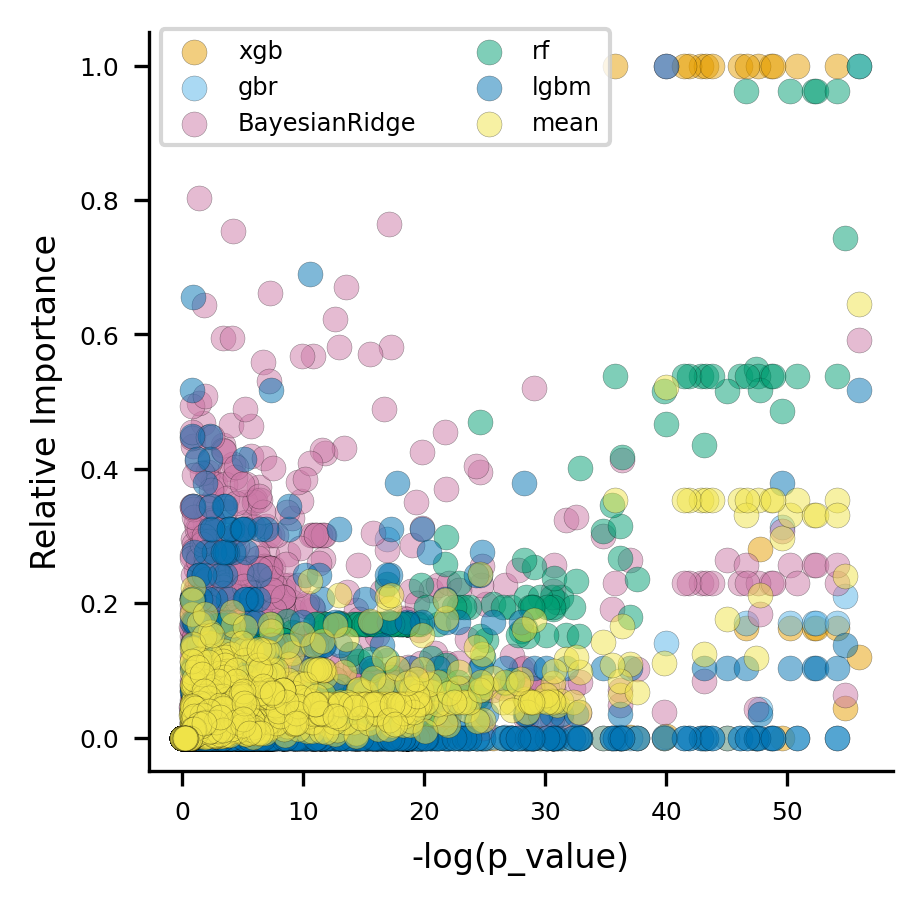

In [136]:
scatter_plot = plot_scatter(summary_result=sr, report_dir=report_dir)

In [137]:
%%time
mean_imp = mean_importance(top, report_dir=report_dir)

CPU times: total: 453 ms
Wall time: 447 ms


mean Done


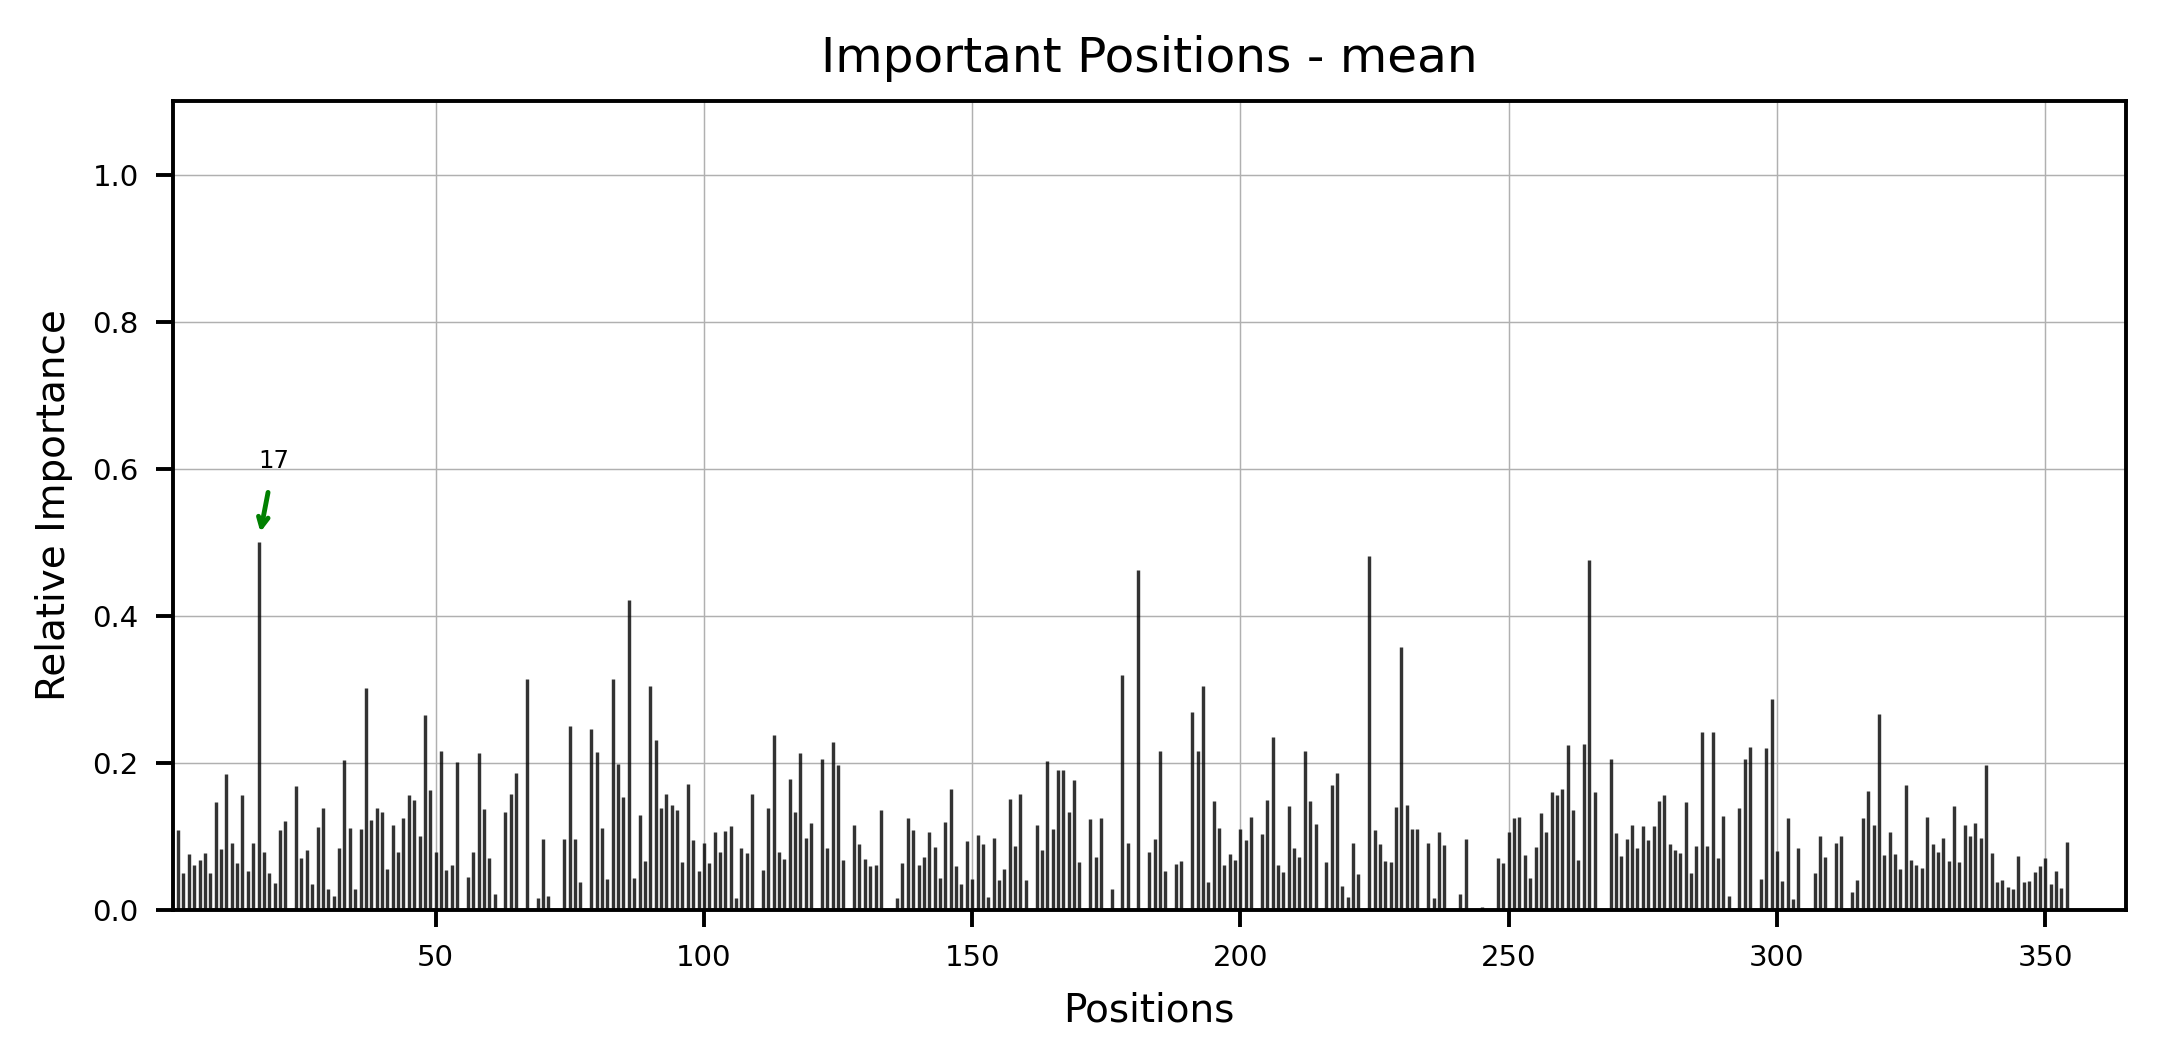

In [138]:
dp_plot(importance=mean_imp,imp_col='mean', model_name='mean', report_dir=report_dir)

In [139]:
tr = prep_pipeline[:4].fit_transform(tr)

xgb Done
xgb  Done
gbr Done
gbr  Done
BayesianRidge Done
BayesianRidge  Done
rf Done
rf  Done
lgbm Done
lgbm  Done


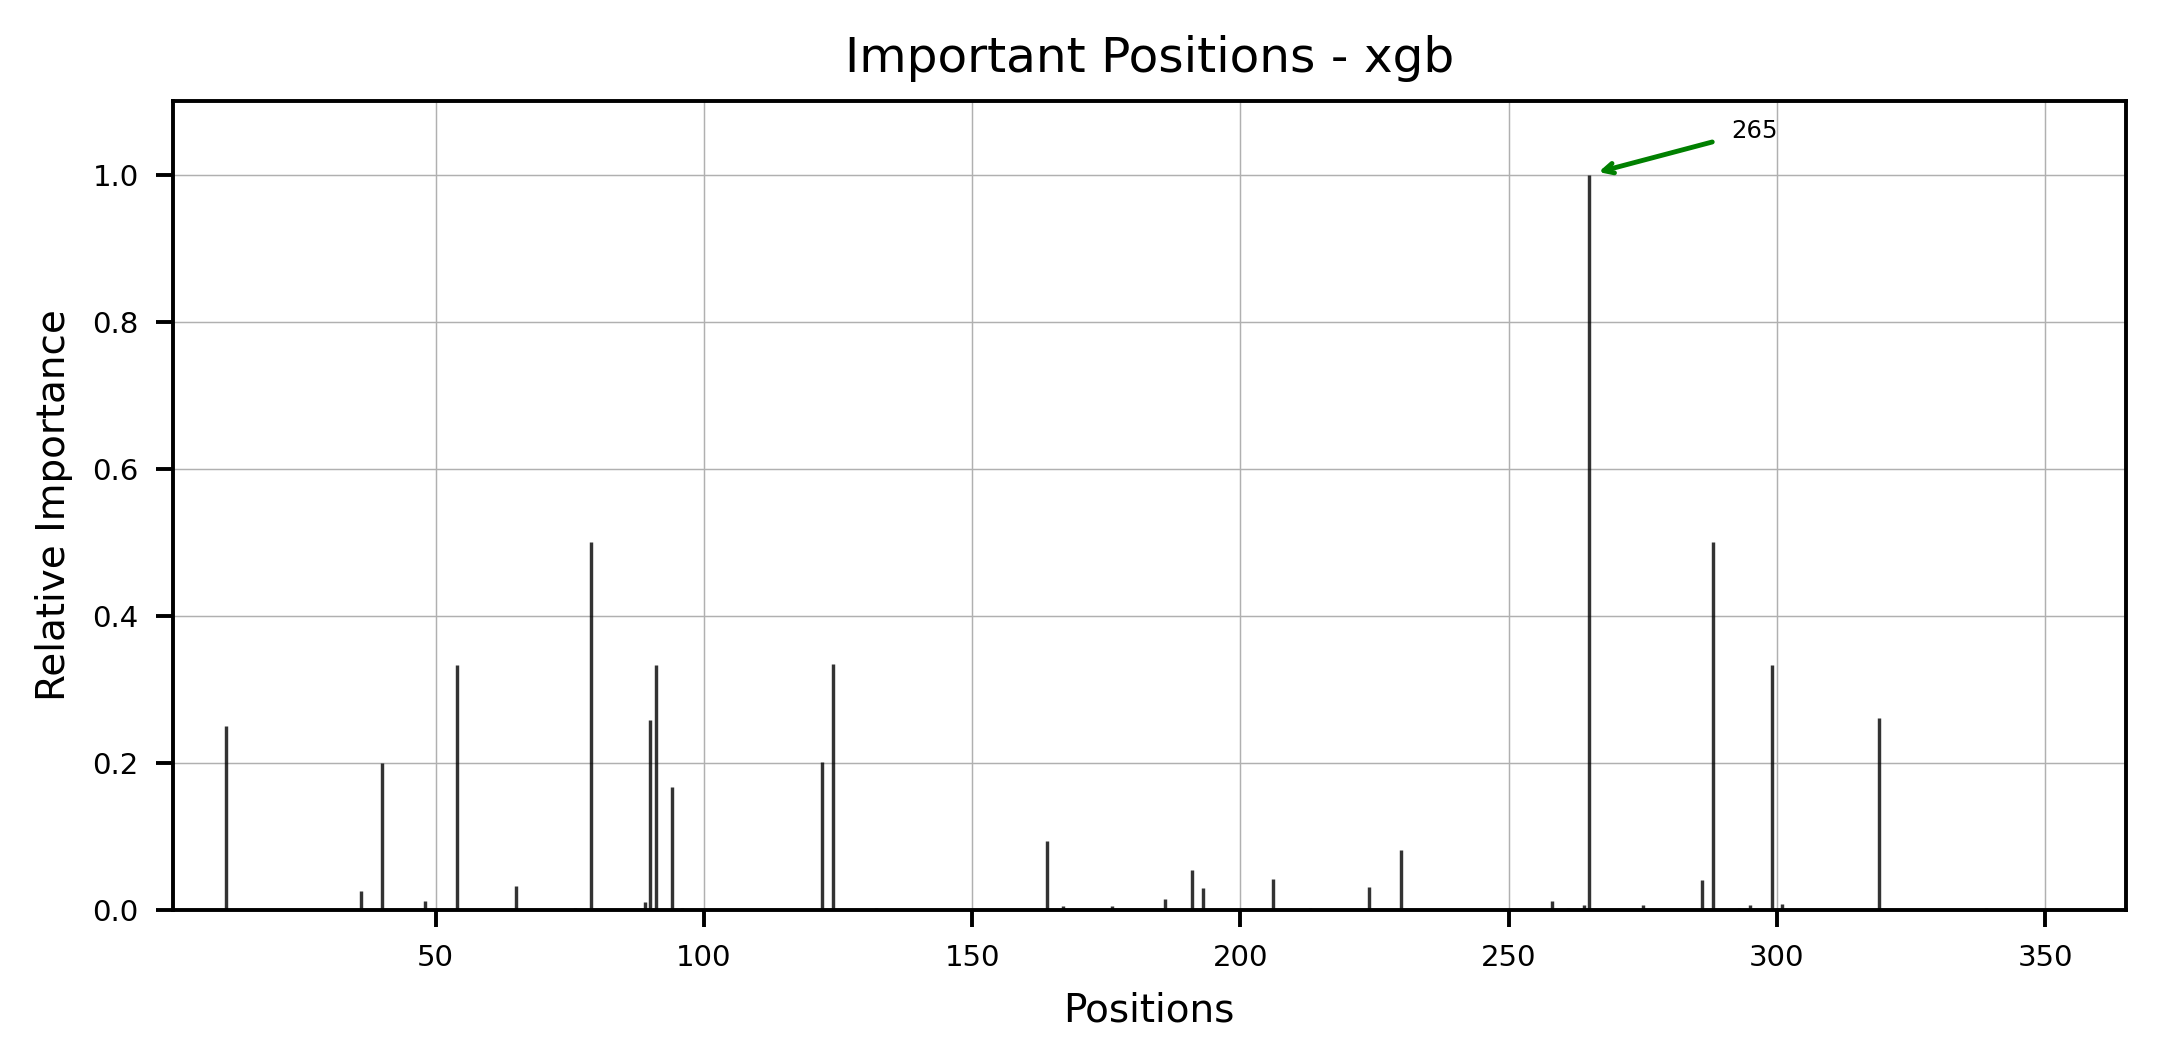

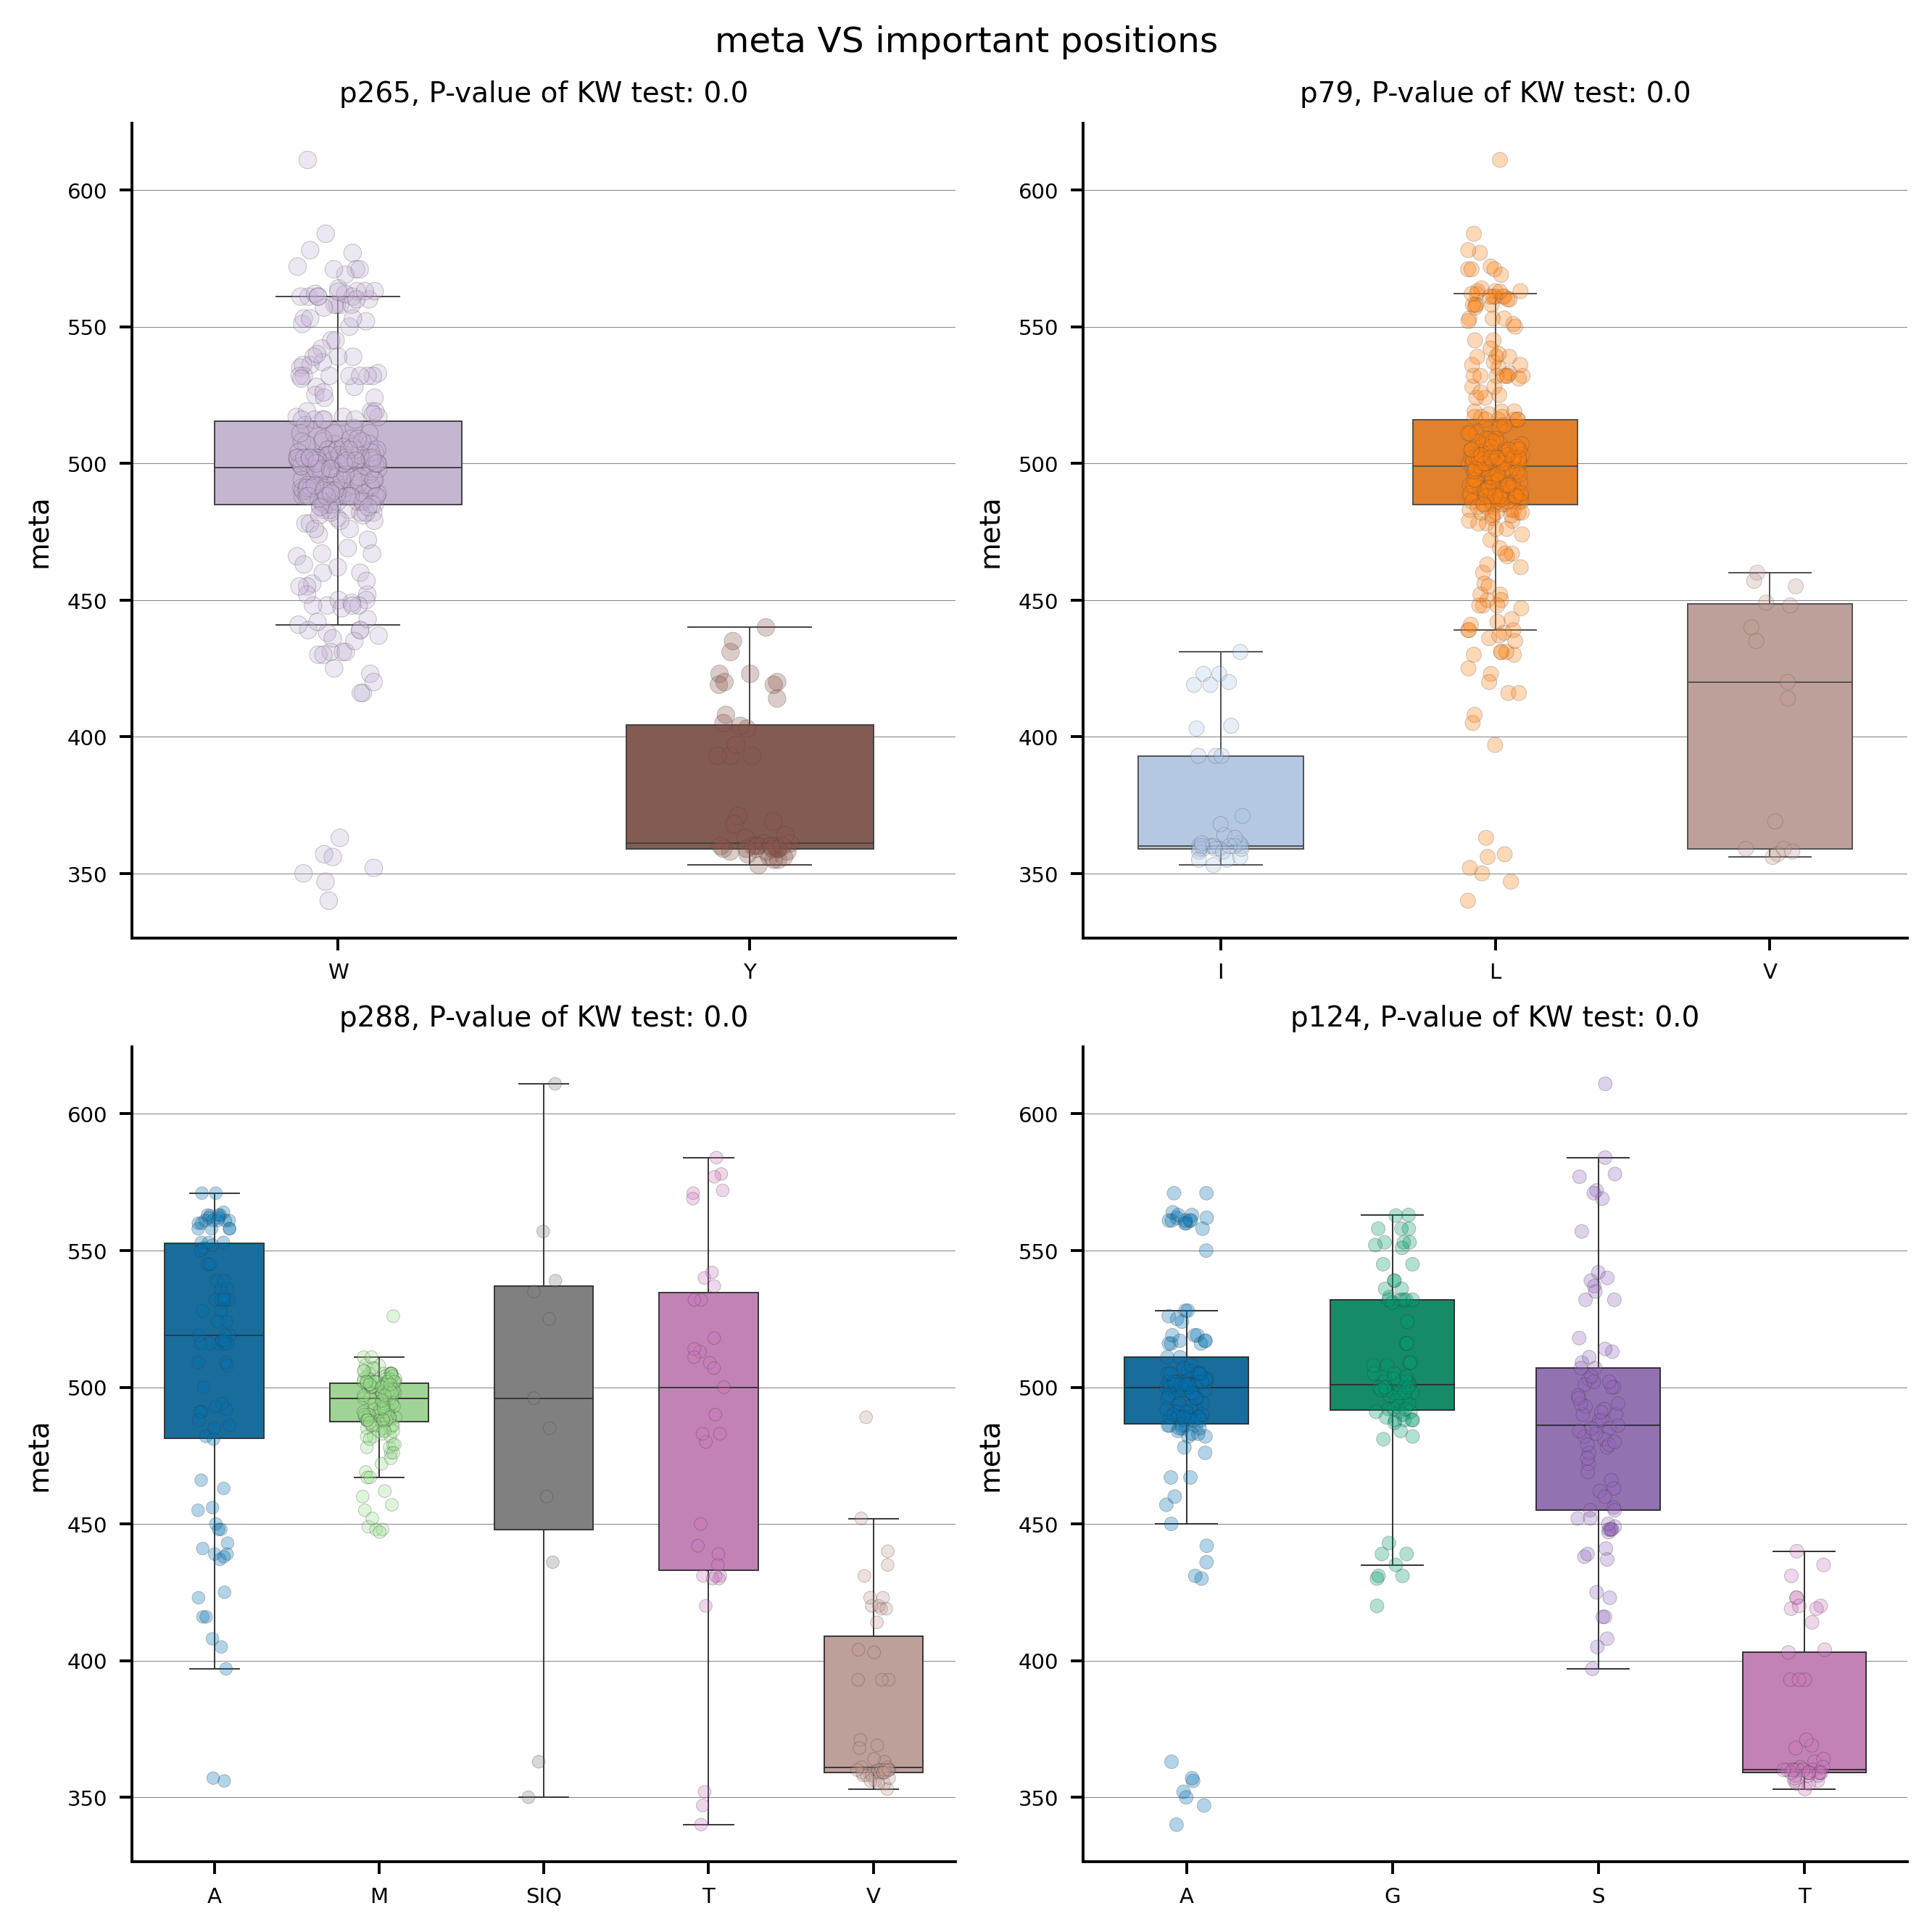

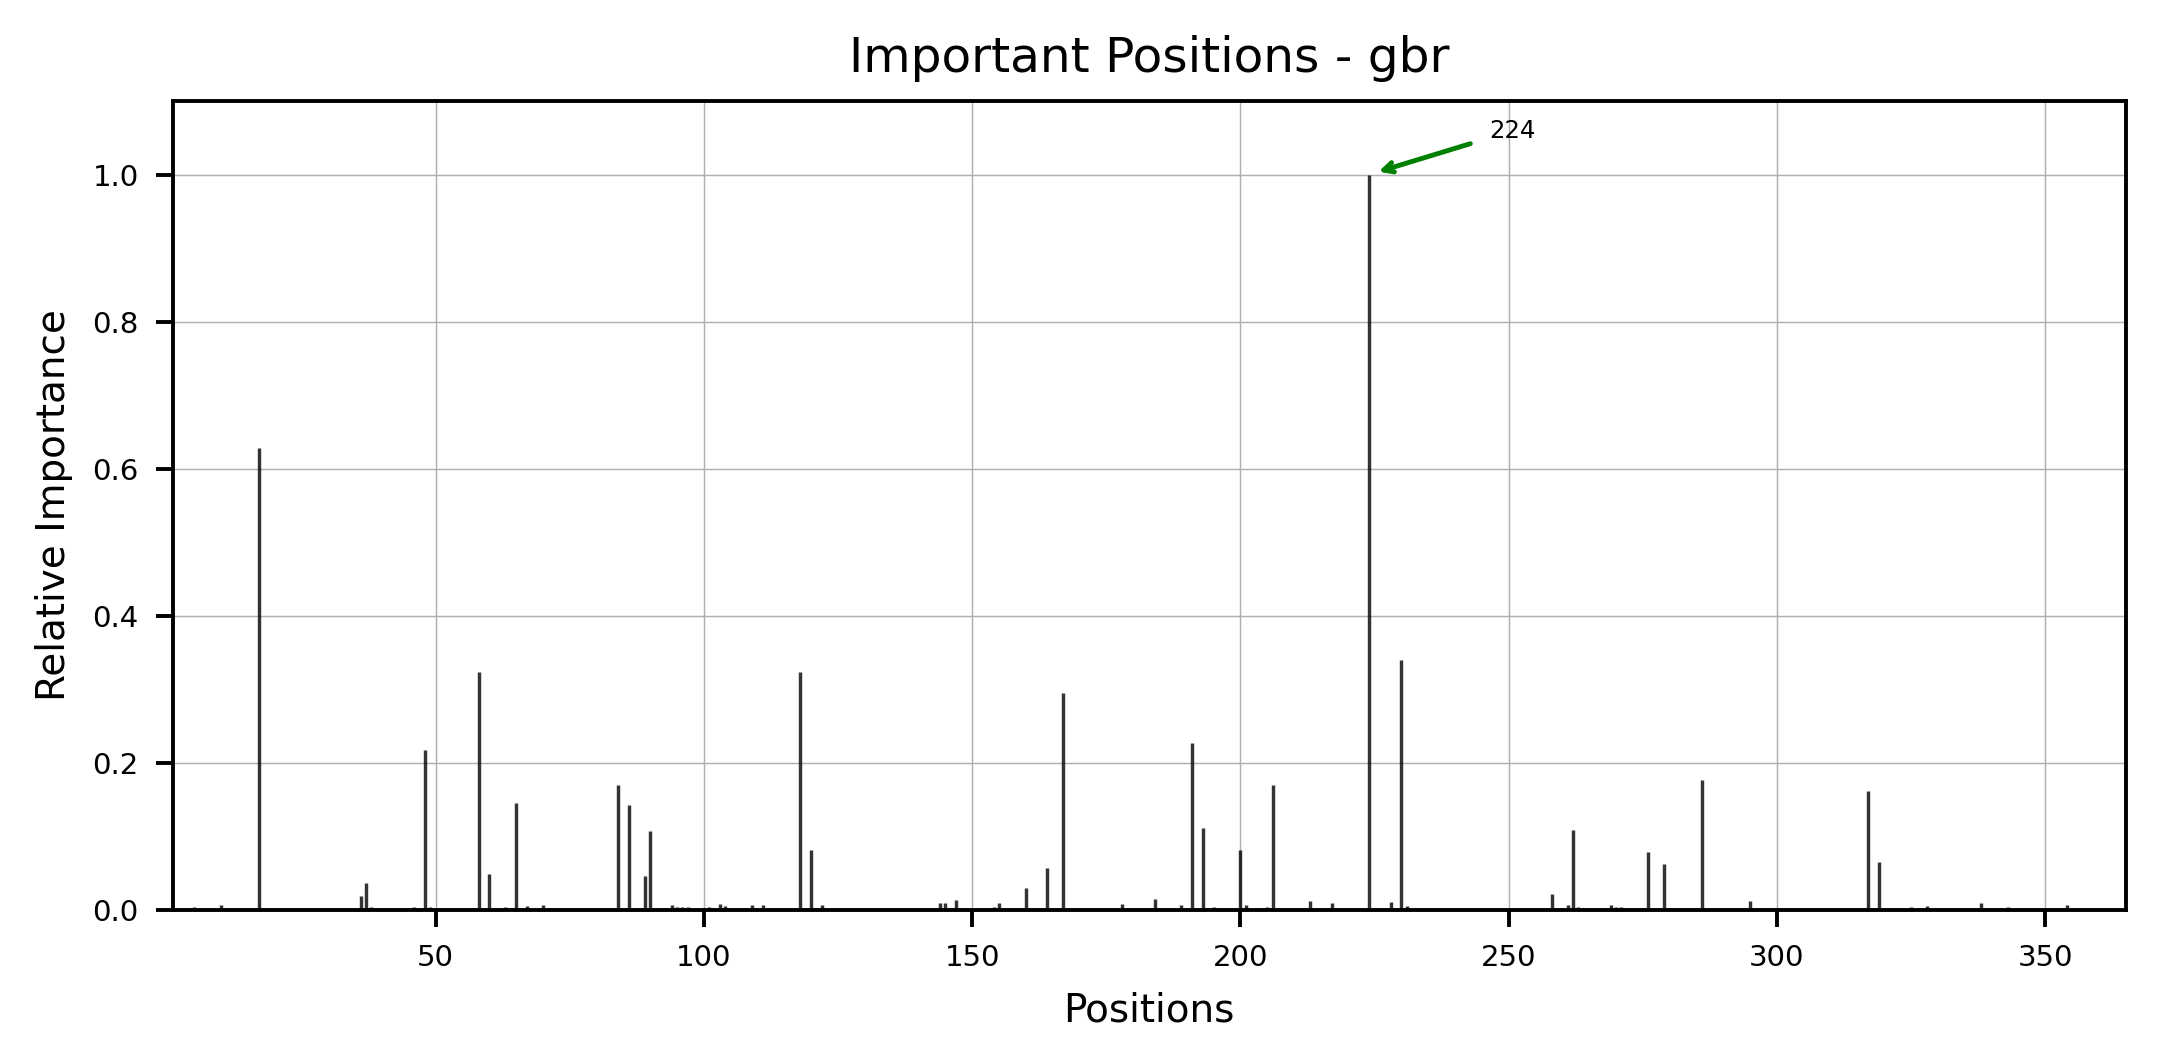

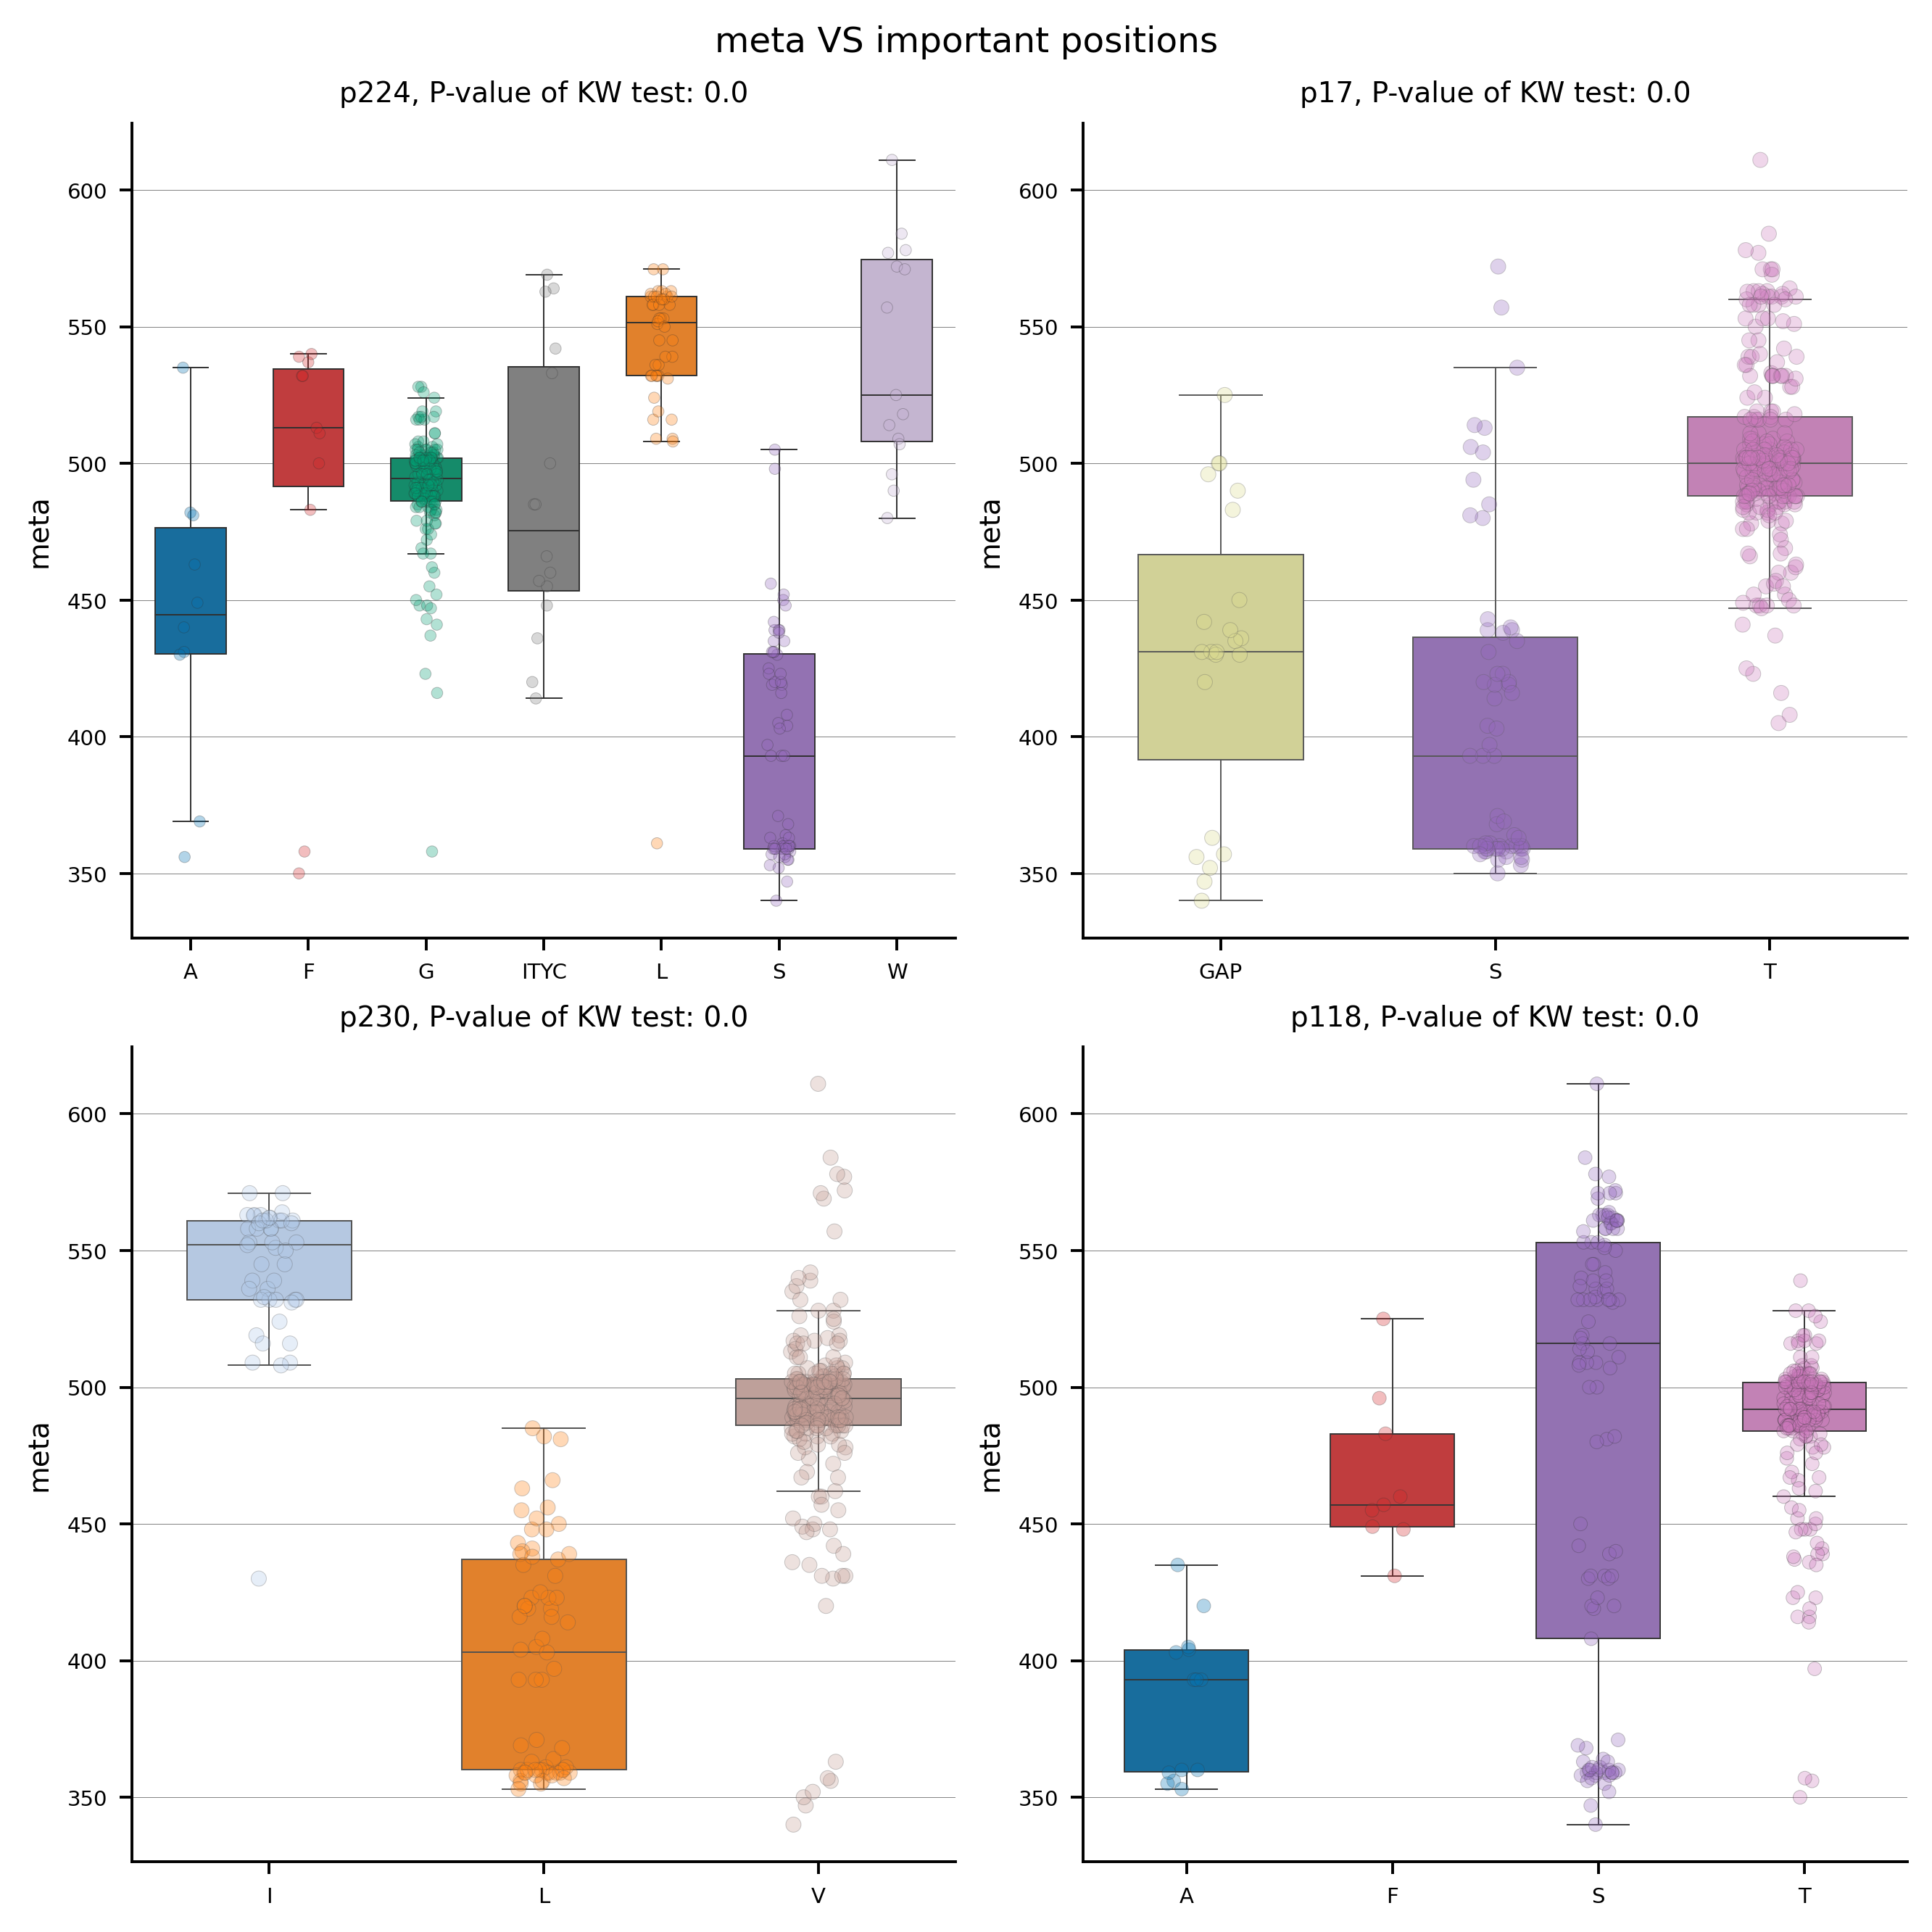

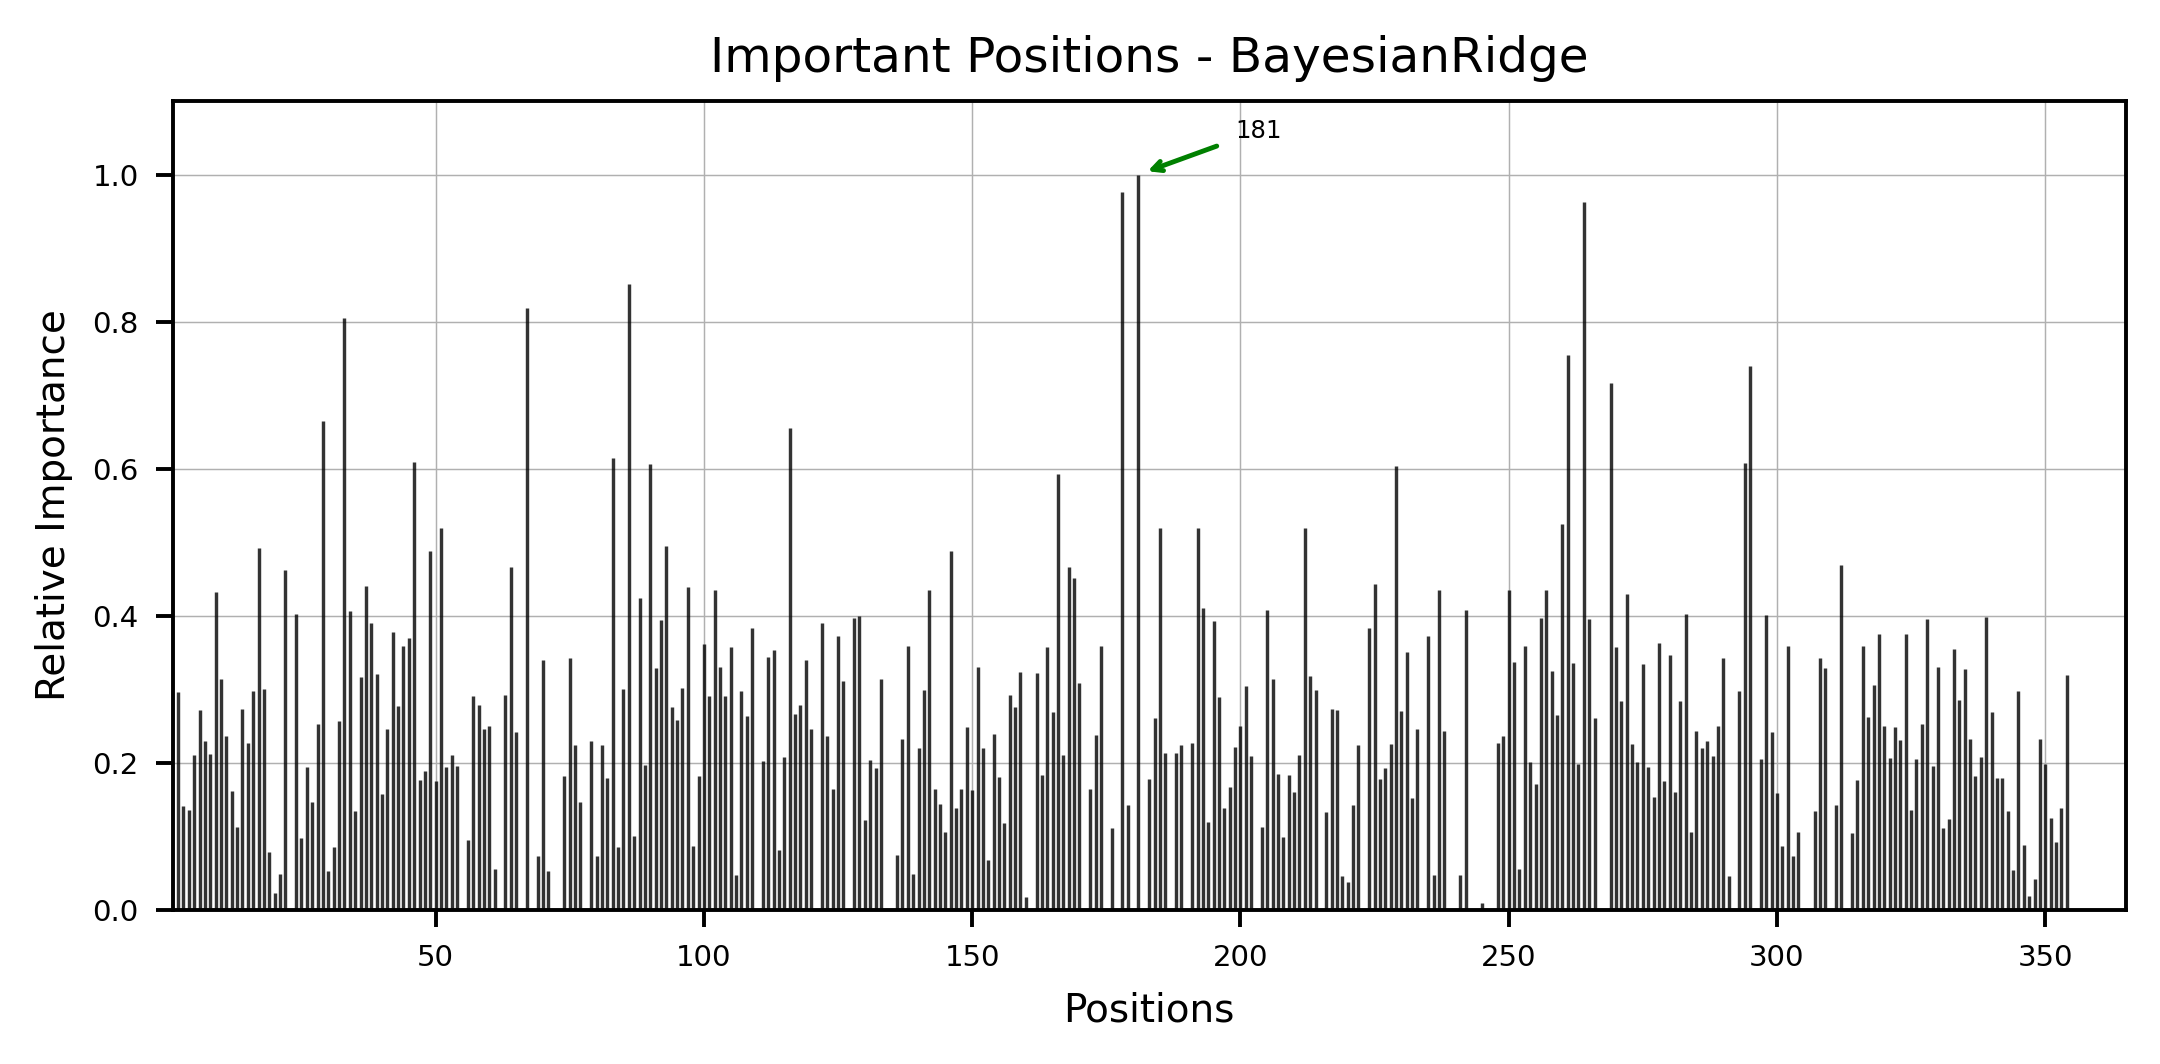

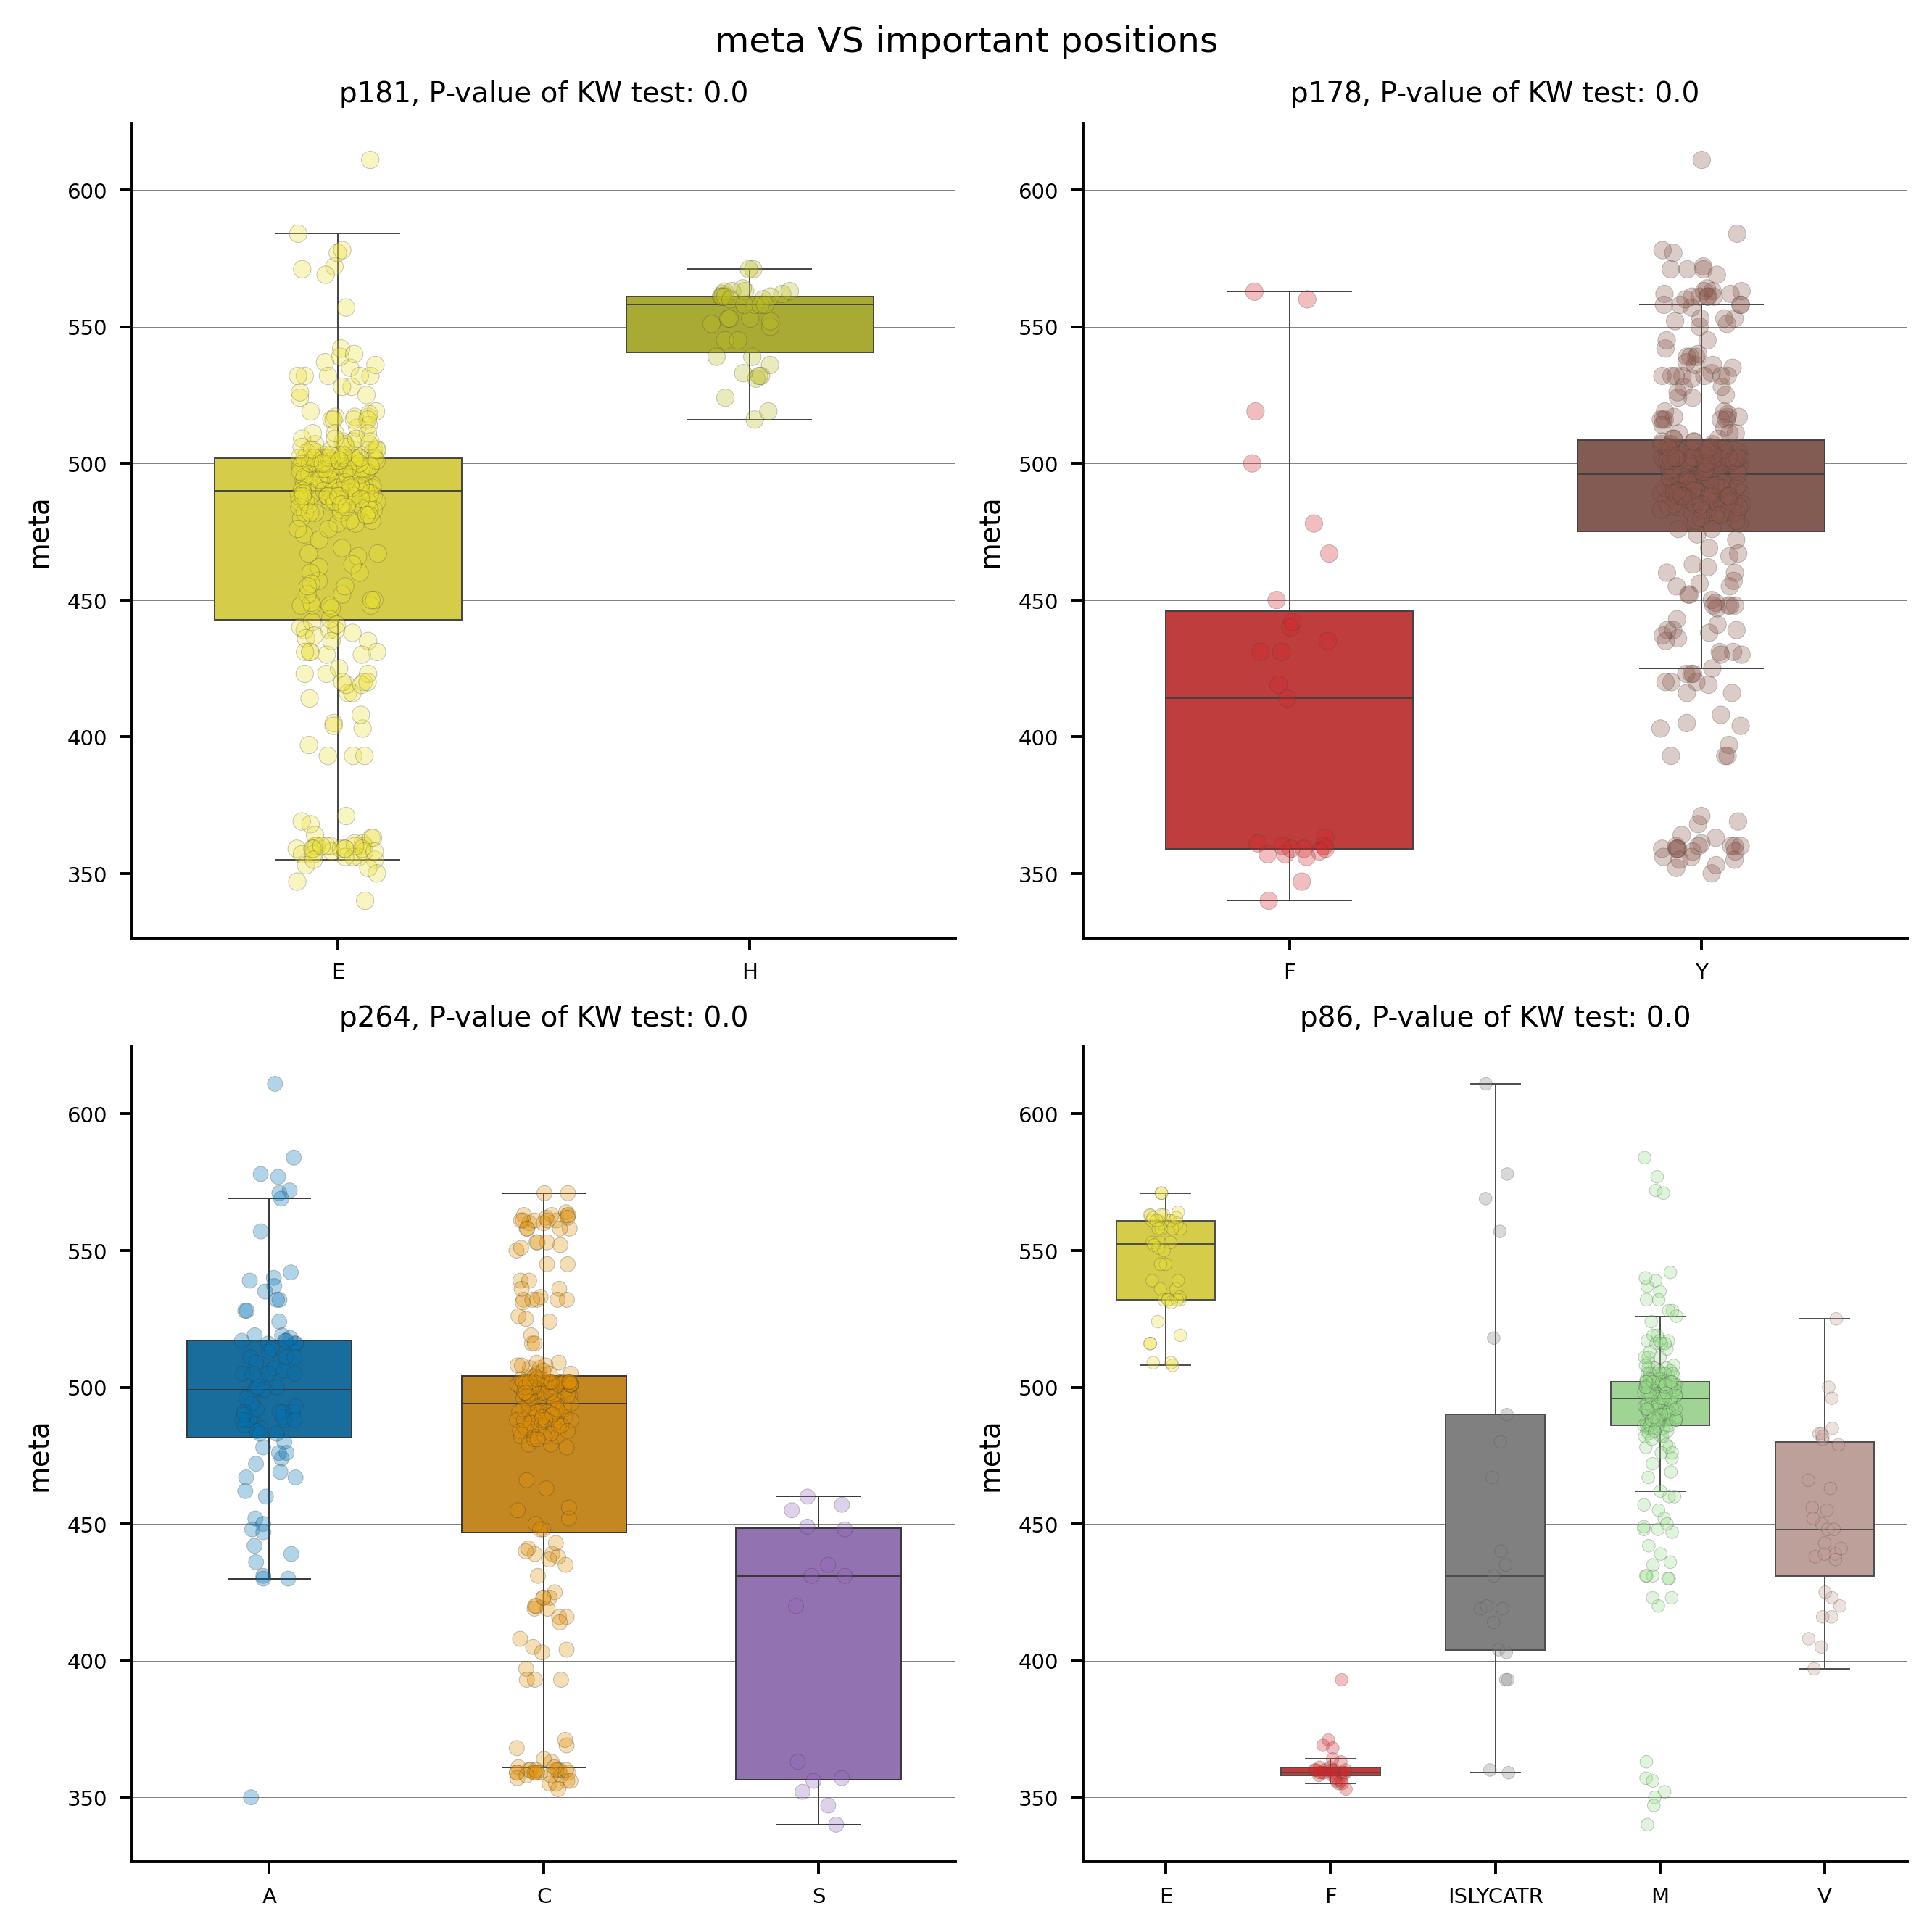

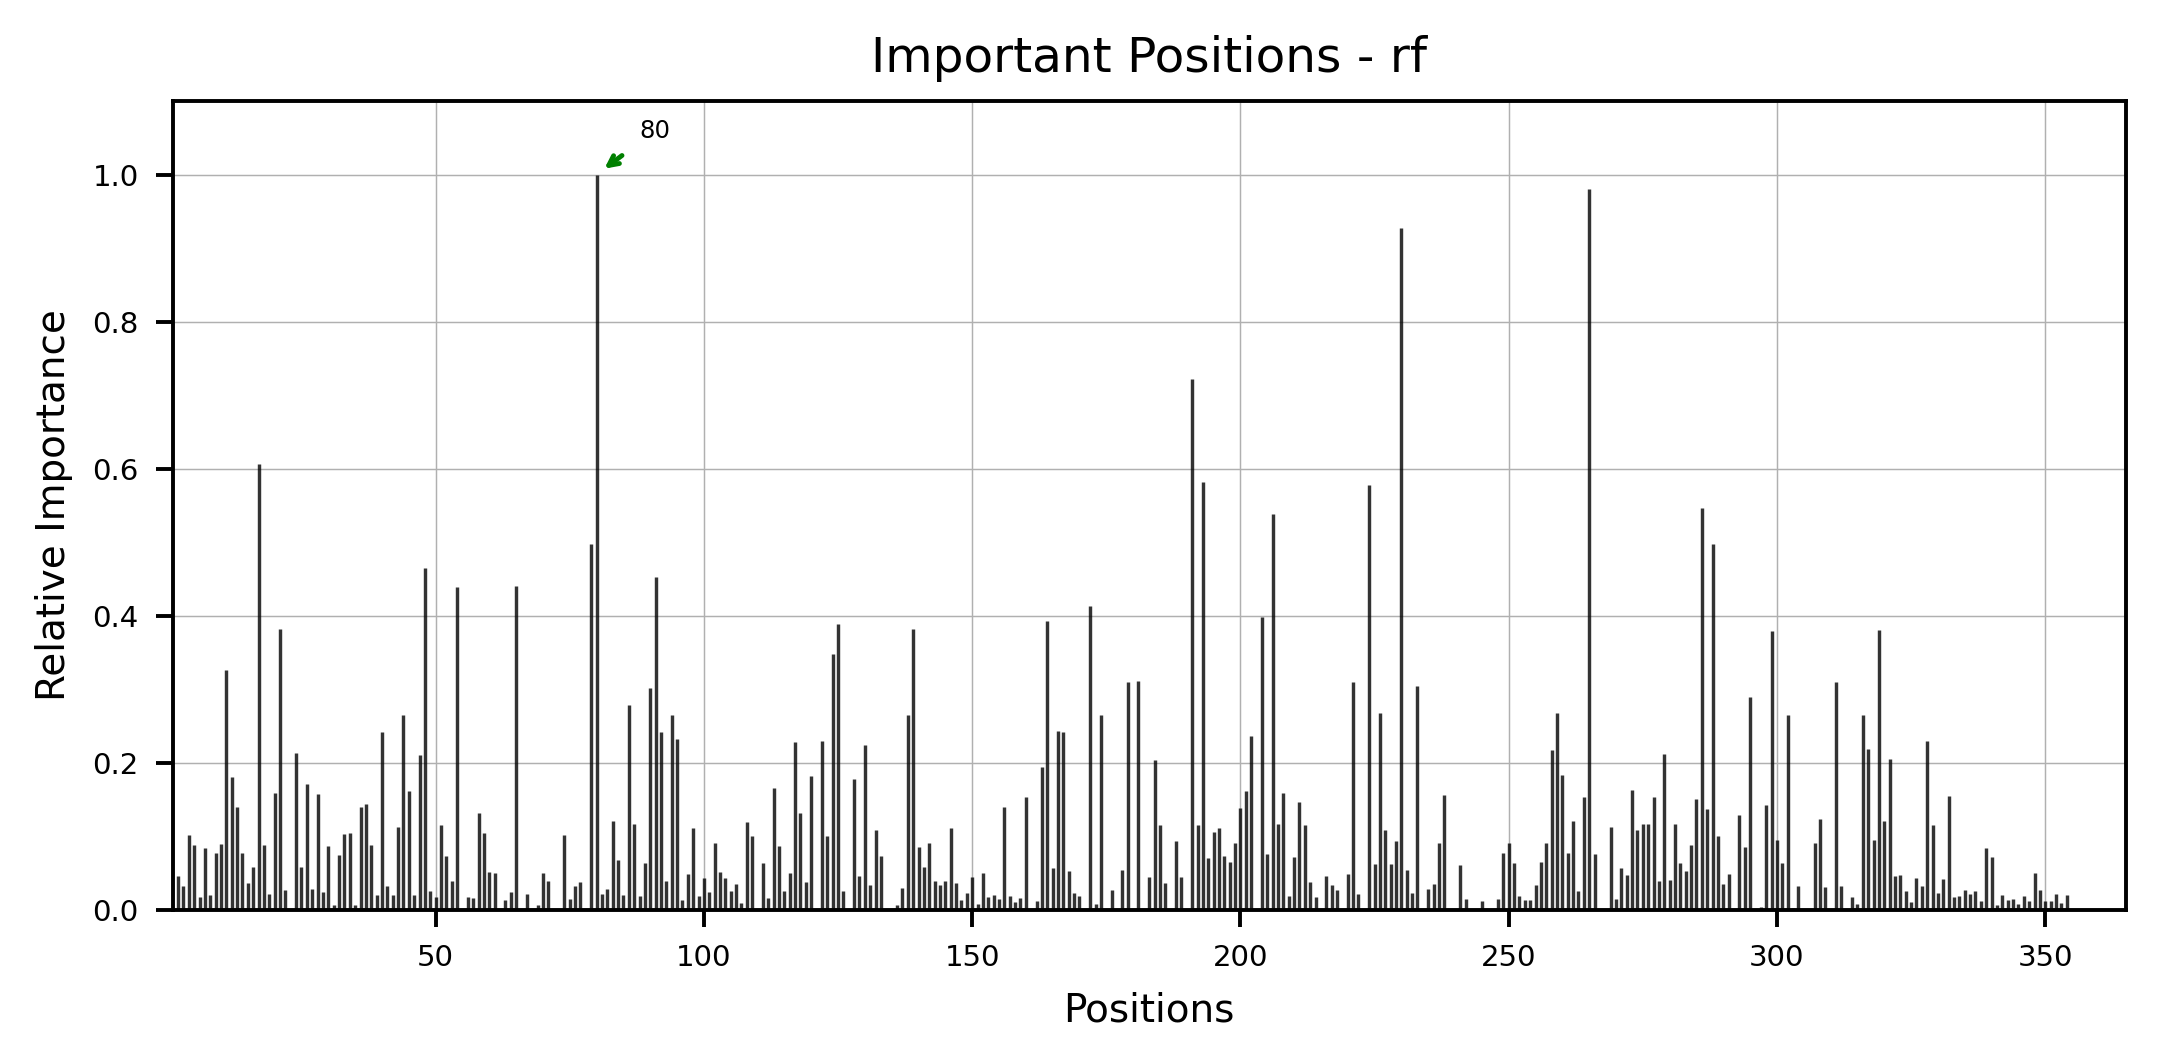

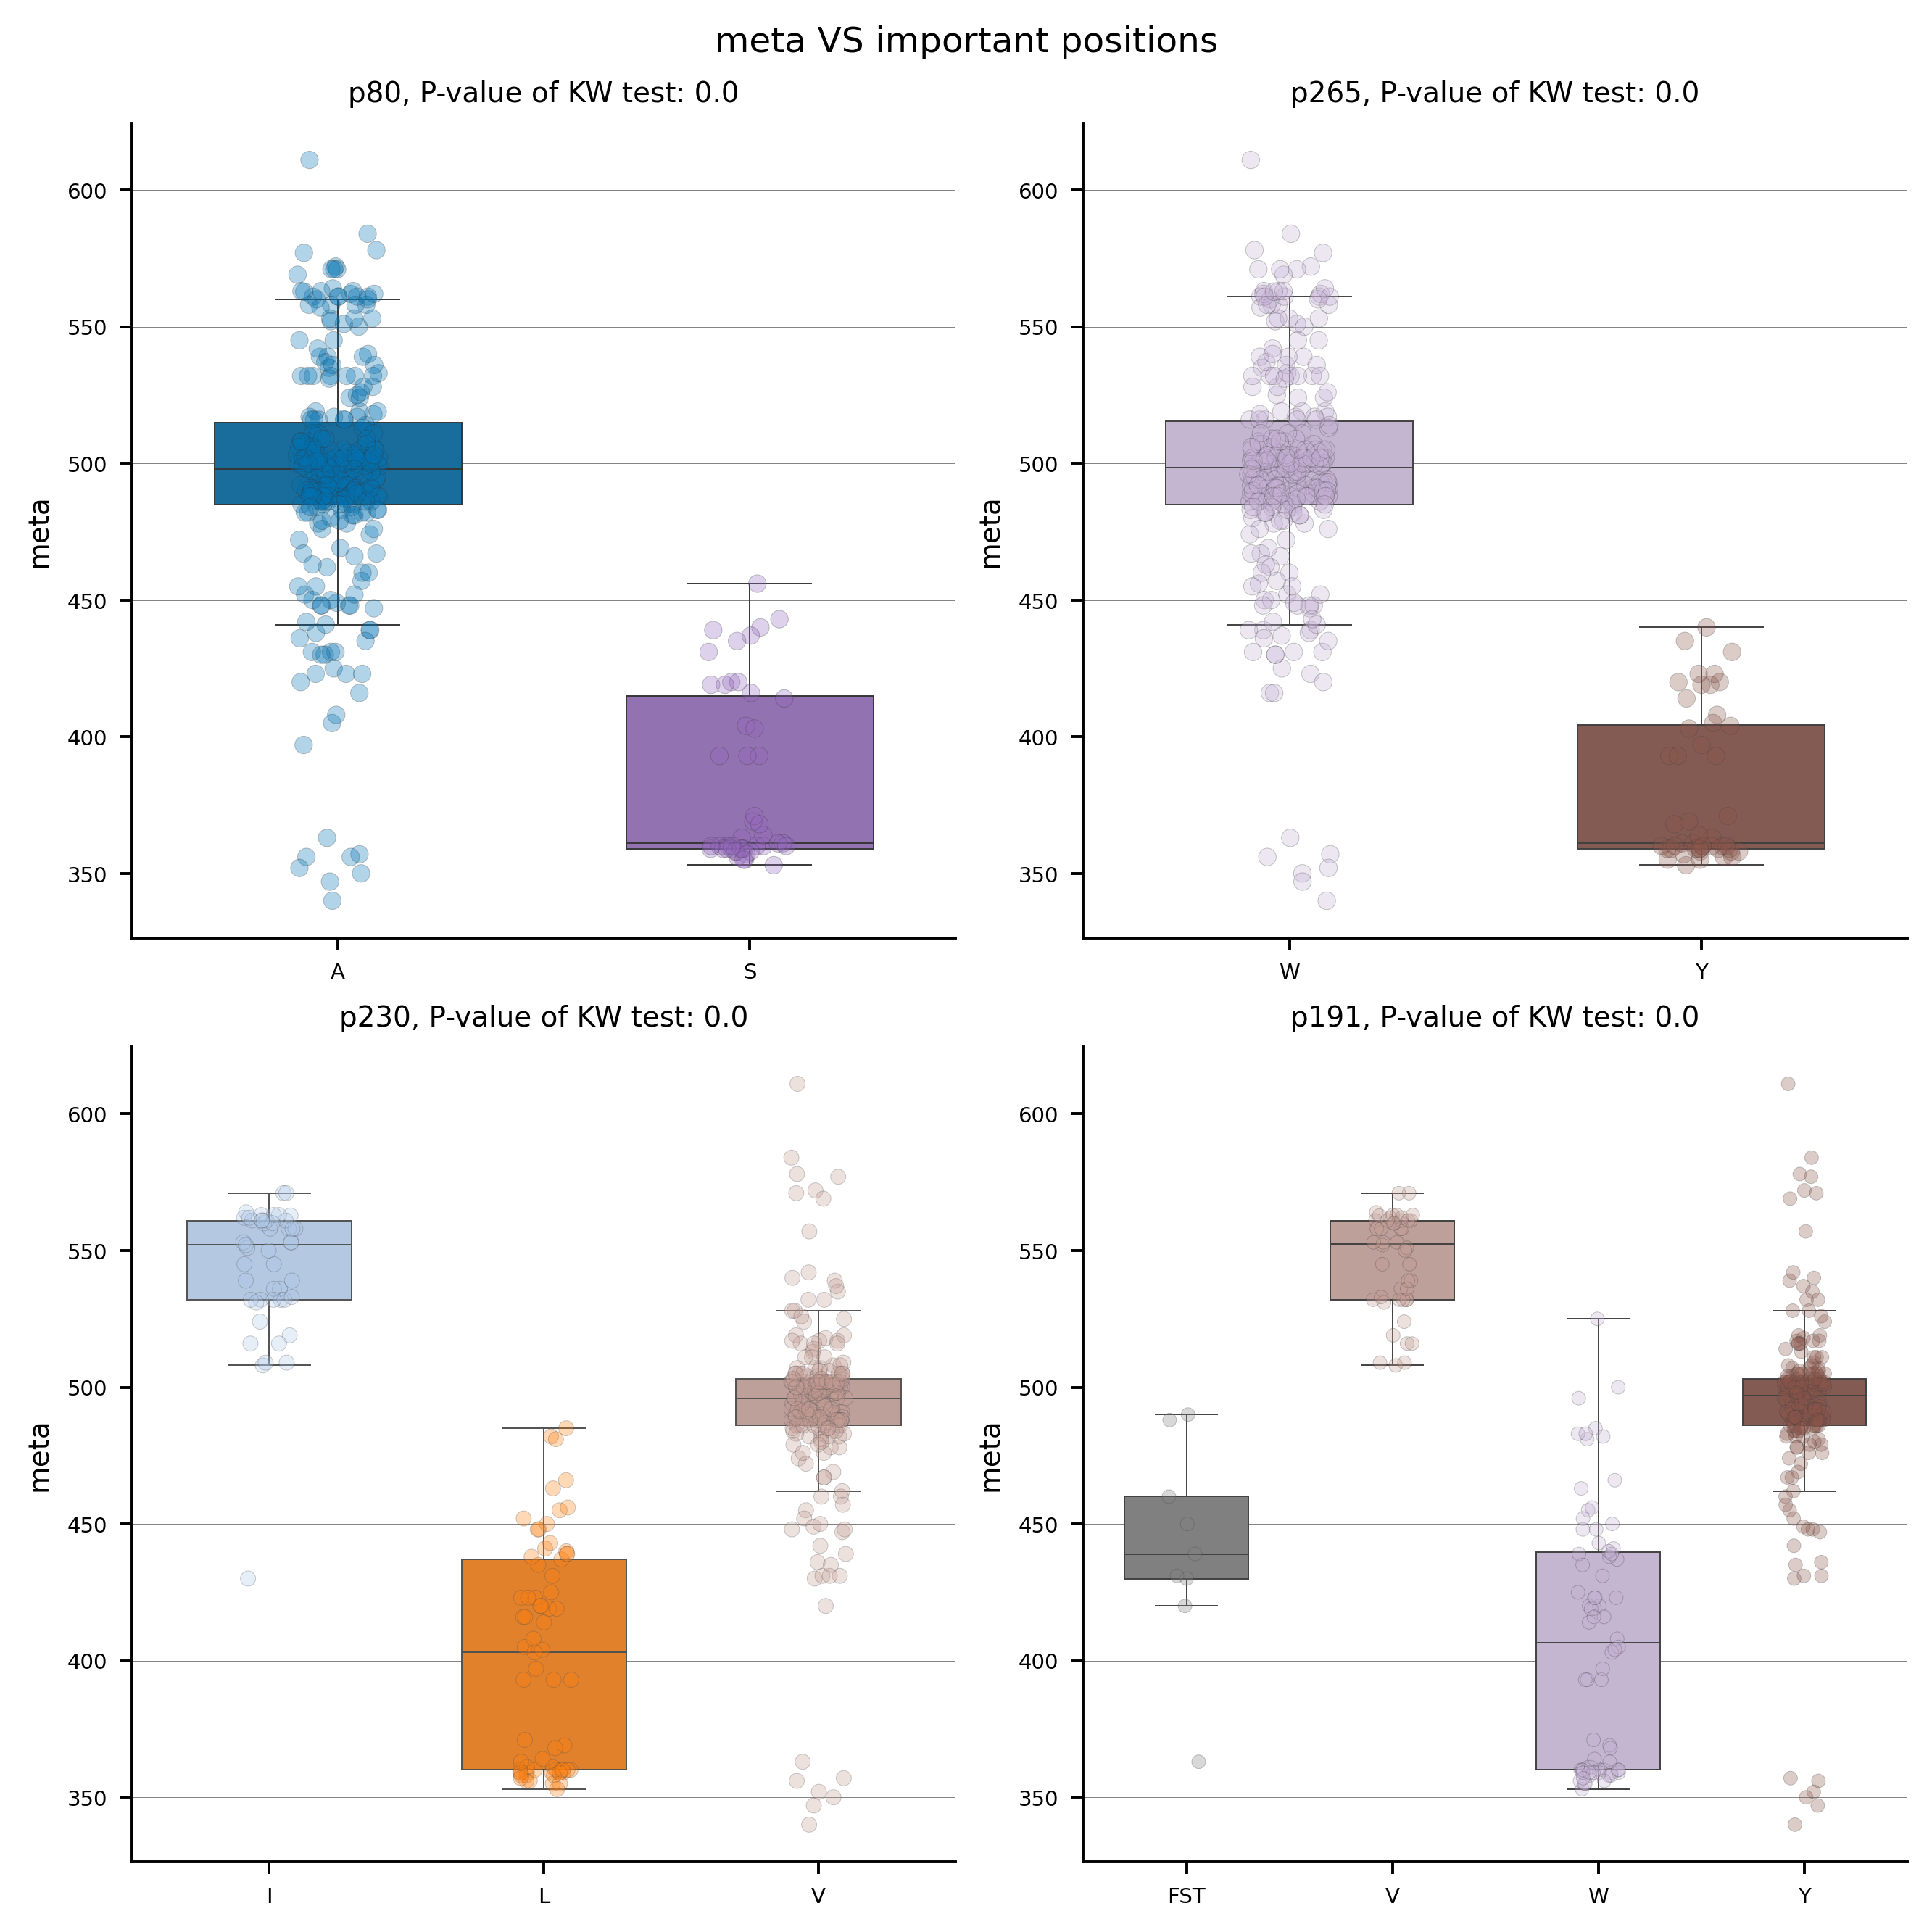

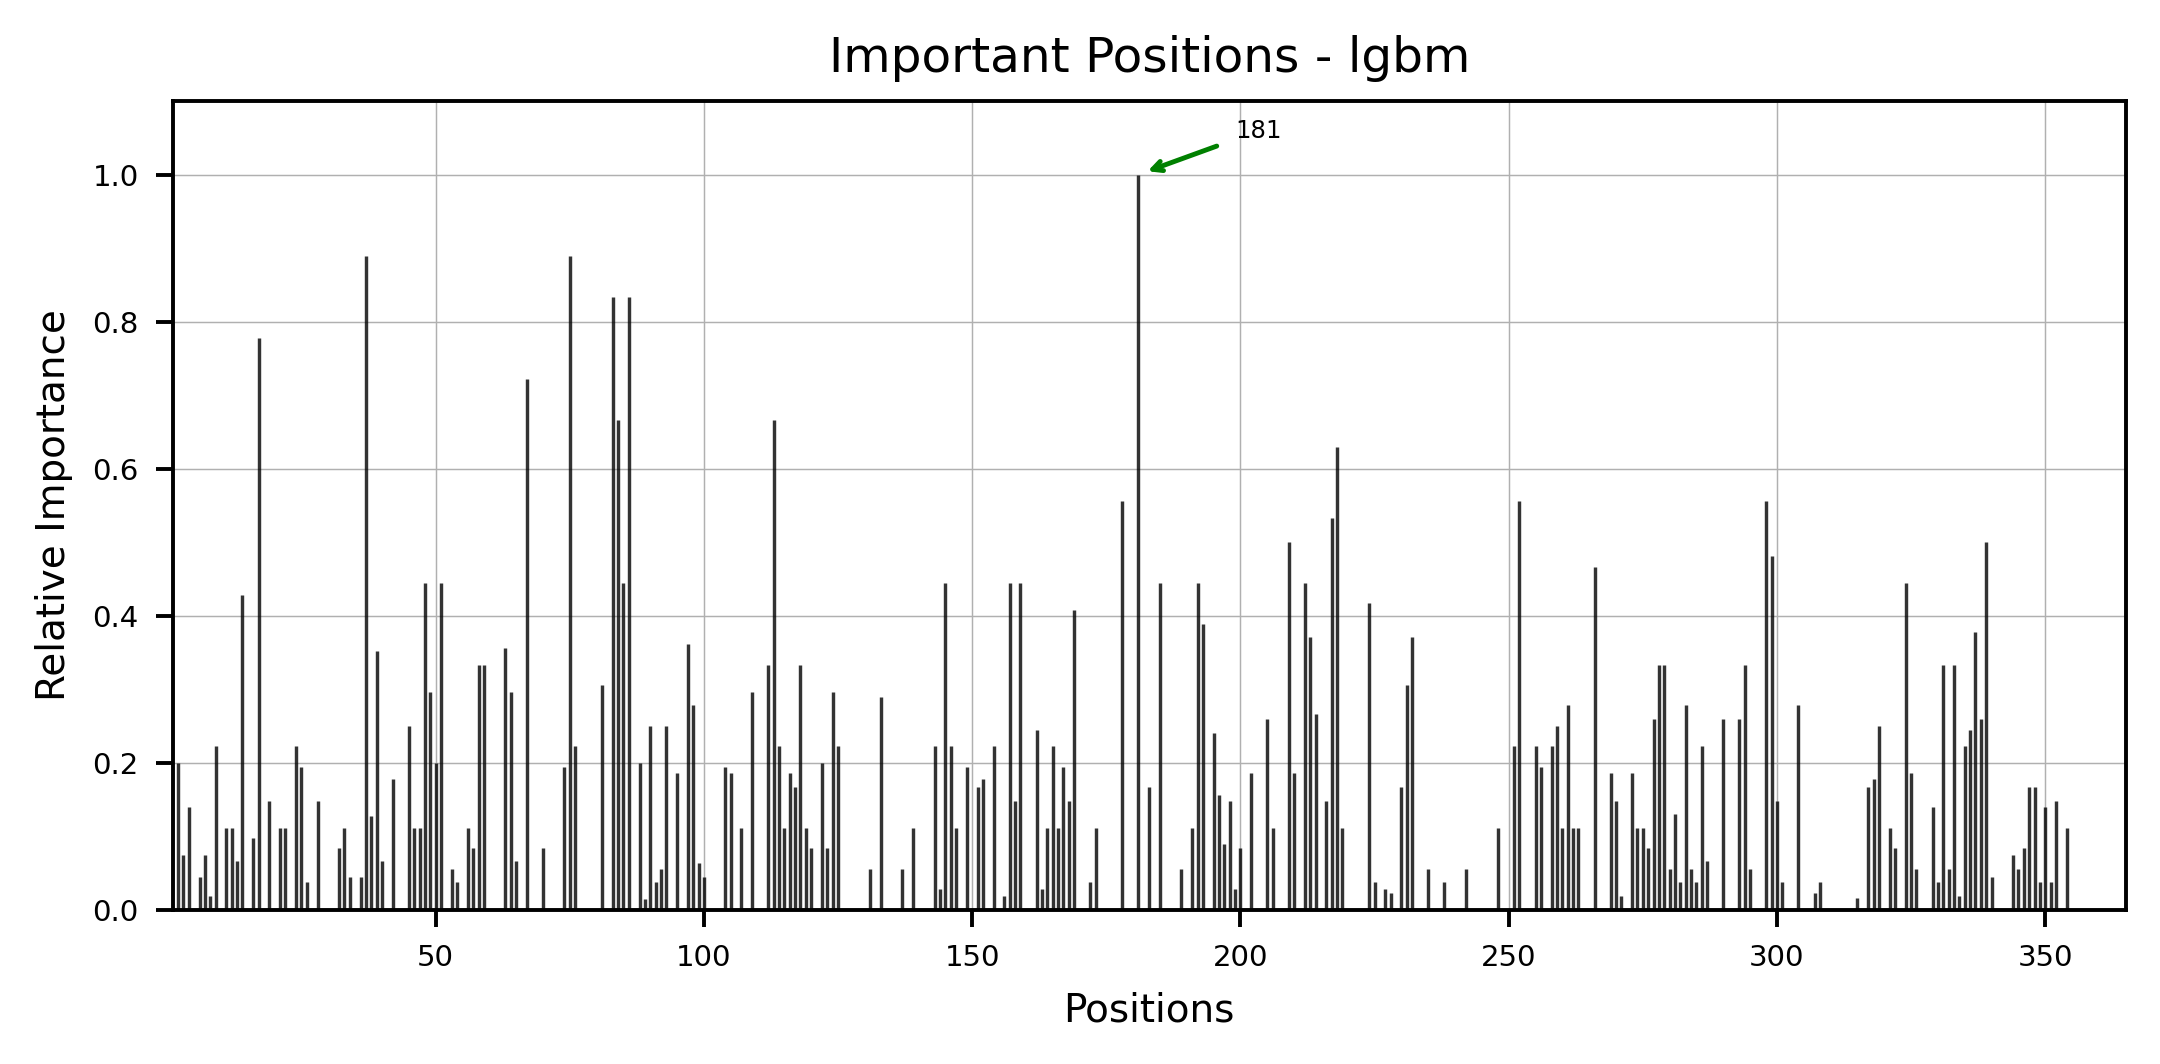

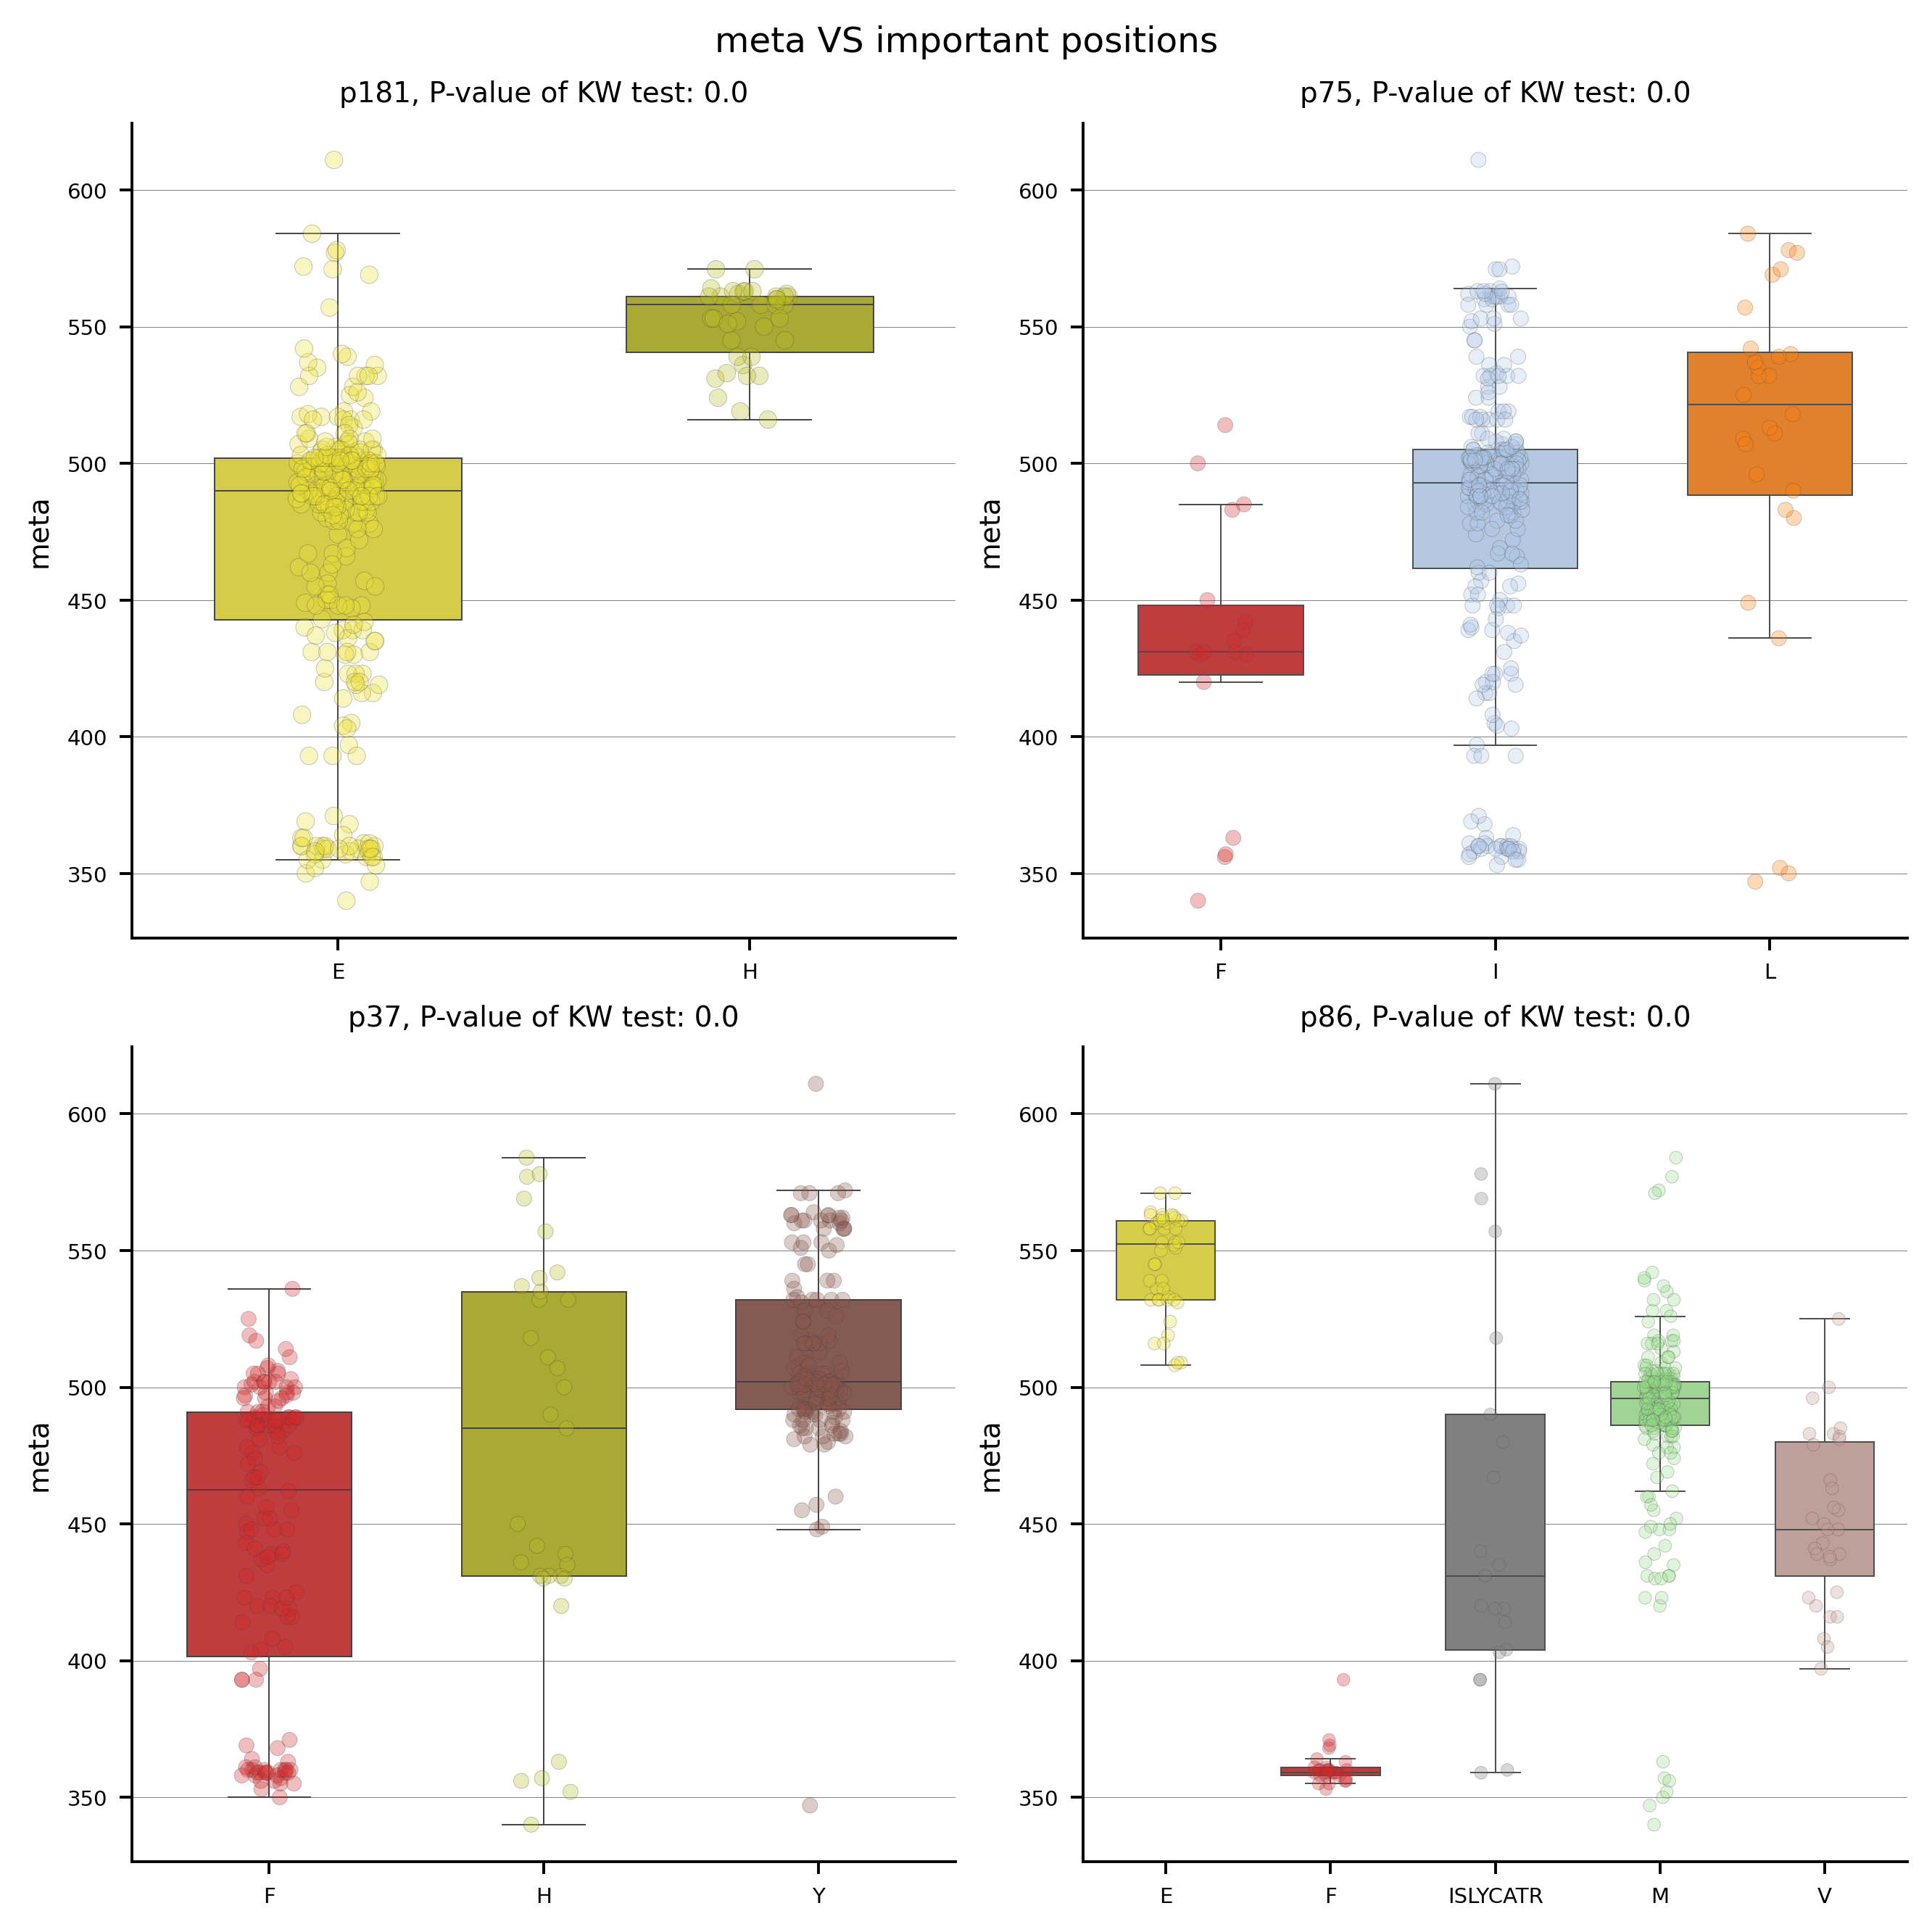

In [147]:
for model in top:
    model_name = model.steps[-1][0]
    dp_plot(importance=importance_from_pipe(model),
            imp_col='standard_value',
            model_name = model_name, report_dir=report_dir)
    
    plot_imp_model(importance=importance_from_pipe(model), 
               X_train=tr, y_train=y, model_name=model_name,
                   meta_var='meta', model_type=ana_type, report_dir=report_dir)

In [ ]:
pl = plot_imp_all(final_models=top,
                  X_train=tr, y_train=y,
                  model_type = ana_type,
                  report_dir=report_dir, max_plots=100,
                  figsize=(2.5, 3))

In [148]:
from deepBreaks.utils import load_obj
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [150]:
top_per_mod = report_dir + '/' + mtml[2] + '.pkl'
load_top_mod = load_obj(top_per_mod)

In [151]:
print(f'Here is a list of your top performing models to test...\n{mtml}')

Here is a list of your top performing models to test...
['xgb', 'gbr', 'BayesianRidge', 'rf', 'lgbm']


# <font color=red>STEP 4: Translate Candidate STSs</font> 
## This section is used to translate candidate STSs to the bovine or squid equivalent.
### The bovine and squid sequence dataframes that were saved earlier and are called again here


In [152]:
import pandas as pd
import os

In [153]:
#STEP 4: Translate Candidate STSs 
#translate candidate STSs to the bovine or squid equivalent 
#bovine and squid sequence dataframes were saved earlier and are called again here
m = 0
tm = ''
k=0
gaps=0
#import importance_report.csv from report_dir
true_pos = []
aa = []
tmd = []
df = pd.read_csv(f'{report_dir}\importance_report.csv')
#take the list of important sites and translate them to the bovine standard equivalent, 
#we do this by taking the site number and subtracting the number of '-' between the start of the sequence and the desired site. 
for rows in reference_seq.values:  
    rows = str(rows)
    #print(rows)
    if rows == 'nan':
    #We want to write the 'true_pos', 'aa', and 'TMD' to the 'importance_report' csv file
        gaps += 1
        k += 1
        true_pos.append('NA')
        aa.append('-')
        tmd.append('NA')
    else:
        #print("The number of gaps is " + str(gaps))
        k+=1
        trans_site = k - gaps
        if ref_seq_name == 'bovine':
            if trans_site in range(3,37):
                tm = 'N-Termina'
            elif trans_site in range(37,62):
                tm = '1'
            elif trans_site in range(74,96):
                tm = '2'
            elif trans_site in range(111,133):
                tm = '3'
            elif trans_site in range(153,174):
                tm = '4'
            elif trans_site in range(203,225):
                tm = '5'
            elif trans_site in range(253,275):
                tm = '6'
            elif trans_site in range(287,309):
                tm = '7'
            else:
                tm = 'CT/EC'
        else:
            if trans_site in range(3,34):
                tm = 'N-Termina'
            elif trans_site in range(34,59):
                tm = '1'
            elif trans_site in range(71,97):
                tm = '2'
            elif trans_site in range(110,132):
                tm = '3'
            elif trans_site in range(152,173):
                tm = '4'
            elif trans_site in range(200,225):
                tm = '5'
            elif trans_site in range(262,284):
                tm = '6'
            elif trans_site in range(294,315):
                tm = '7'
            else:
                tm = 'CT/EC'                
        
        true_pos.append(str(trans_site))
        aa.append(rows)
        tmd.append(tm)
true_pos.pop()
aa.pop()
tmd.pop()

df['true_position'] = true_pos
df['TMD'] = tmd
df['amino_acid'] = aa
df.to_csv(path_or_buf= os.path.join(report_dir,r'importance_report.csv'),index = 'Feature',mode="w")
#df.head()


ValueError: Length of values (353) does not match length of index (355)

# <font color=red>STEP 5: Query the Model to Predict NEW Sequences</font> 
## Takes new sequences, inserts them into existing alignment to properly format for model query, then returns prediction of the λmax value for each sequence...

In [ ]:
import os
import subprocess
from deepBreaks.utils import load_obj
from deepBreaks.preprocessing import read_data
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from vpod_scripts.prediction_functions_db import process_sequences_from_file

This is a version of the prediction method which can be used DIRECTLY after model training... 

In [ ]:
#path to the mafft.bat file - change to your own directory!
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat'
#path to sequences we want to add to an existing alignment in FASTA format
input_file = './subtests/supp_test_data/msp_erg_raw.txt'
#name for desired output file
output_file = 'opsin_predictions.tsv'
#path to target/selected model
selected_model = report_dir + '/' + mtml[0] + '.pkl'
#function for querying model - this will take care of creating an output file for you.
process_sequences_from_file(mafft_exe,input_file,output_file,selected_model,seqFileName, gap_threshold=gap_threshold)


This is a version of the prediction method which can be used to ACCESS EXISTING MODELS in a SEPERATE SESSION after model training... 

In [ ]:
#path to the mafft.bat file - change to your own directory!
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat'
#path to sequences we want to add to an existing alignment in FASTA format
input_file = './subtests/supp_test_data/msp_erg_raw.txt'
#name for desired output file
output_file = 'opsin_predictions.tsv'
#path to the primary alignment used for training the model - if trying access a specific file later
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.0/formatted_data_subsets/vpod_2023-10-16_12-13-11'
seqFileName = f'{path}/VPOD_wds_het_1.0.fasta' 
#path to target/selected model
#can use method below or enter path manually if coming back to notebook with no variables intialized
report_dir ='C:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/result_files/main_model_results/mafft/wds_model_2023-10-16_12-13-40'
selected_model = report_dir + '/gbc.pkl'
#function for querying model - this will take care of creating an output file for you.
process_sequences_from_file(mafft_exe,input_file,output_file,selected_model,seqFileName)

